# Component One
## Predicting Customer Spending Behaviour in Streaming Services 

The goal for this exercise is to explore how supervised learning models can predict Customer 
spending and behaviour patterns in streaming services based on information in this dataset. 
I will also apply classification algorithms and unsupervised learning techniques to 
determine customer churn and identify clustering patterns in customer behaviour, respectively.

In [3]:
#Importing the necessary python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from keras.losses import mean_squared_error
from keras.metrics import mean_squared_error
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

In [4]:
stream_df = pd.read_csv('Streaming-Copy1.csv')   #Importing the dataset into a DataFrame called stream_df
stream_df                                        #Display the contents of the DataFrame

Customer_ID   Age  Gender  Subscription_Length Region Payment_Method  \
0     CUST000001  56.0    Male                   54  South         PayPal   
1     CUST000002  69.0  Female                   21   East     Debit Card   
2     CUST000003  46.0  Female                   49   East         PayPal   
3     CUST000004  32.0    Male                   47   West     Debit Card   
4     CUST000005  60.0    Male                    6   East    Credit Card   
...          ...   ...     ...                  ...    ...            ...   
4995  CUST004996  24.0    Male                    5   East     Debit Card   
4996  CUST004997  66.0  Female                   12   East         PayPal   
4997  CUST004998  26.0  Female                    1   East    Credit Card   
4998  CUST004999  53.0  Female                   44  South     Debit Card   
4999  CUST005000  36.0  Female                   22   East     Debit Card   

      Support_Tickets_Raised  Satisfaction_Score  Discount_Offered  \
0                          0                 9.0              6.42   
1                          1                 2.0             13.77   
2                          3                 8.0             19.91   
3                          3                 1.0             13.39   
4                          2                 NaN             13.18   
...                      ...                 ...               ...   
4995                       0                 8.0             18.03   
4996                       3                 5.0              5.84   
4997                       2                 8.0              6.76   
4998                       1                10.0              5.95   
4999                       1                 8.0             11.36   

      Last_Activity  Monthly_Spend  Churned  
0               319          62.11        1  
1               166          37.27        1  
2               207          61.82        0  
3               108          40.96        1  
4                65          45.97        0  
...             ...            ...      ...  
4995            121          51.61        0  
4996            192          36.32        0  
4997            354          42.07        1  
4998             31          60.09        0  
4999            357          49.48        1  

[5000 rows x 12 columns]

In [5]:
stream_df.info()    #To Display concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   object 
 1   Age                     4500 non-null   float64
 2   Gender                  5000 non-null   object 
 3   Subscription_Length     5000 non-null   int64  
 4   Region                  5000 non-null   object 
 5   Payment_Method          5000 non-null   object 
 6   Support_Tickets_Raised  5000 non-null   int64  
 7   Satisfaction_Score      4500 non-null   float64
 8   Discount_Offered        5000 non-null   float64
 9   Last_Activity           5000 non-null   int64  
 10  Monthly_Spend           5000 non-null   float64
 11  Churned                 5000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


In [6]:
stream_df.isnull().sum()    #To count the number of missing (null/NaN) values in each column

Customer_ID                 0
Age                       500
Gender                      0
Subscription_Length         0
Region                      0
Payment_Method              0
Support_Tickets_Raised      0
Satisfaction_Score        500
Discount_Offered            0
Last_Activity               0
Monthly_Spend               0
Churned                     0
dtype: int64

In [7]:
df_headers = stream_df.columns             #Get all column names from the DataFrame
for col in df_headers:                     #Loop through each column and print its unique values
    print(f"\nUnique values in '{col}':")
    print(stream_df[col].unique())


Unique values in 'Customer_ID':
['CUST000001' 'CUST000002' 'CUST000003' ... 'CUST004998' 'CUST004999'
 'CUST005000']

Unique values in 'Age':
[56. 69. 46. 32. 60. 25. 38. 36. nan 28. 41. 53. 57. 20. 39. 19. 61. 55.
 50. 29. 42. 66. 44. 45. 33. 68. 54. 24. 26. 35. 21. 31. 67. 43. 64. 52.
 34. 23. 59. 51. 27. 48. 65. 40. 62. 58. 18. 22. 30. 49. 47. 37. 63.]

Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Subscription_Length':
[54 21 49 47  6 48  3 10  5 46 26 45 38 44  8 15 59 16  1 37 52 31 13 56
 55 43  2 27 58 25 11 33 53  7 51 20 50 57 29  9 30 36 22 23 41 40 28 14
 24 42 18 12 39 17 35 34  4 32 19]

Unique values in 'Region':
['South' 'East' 'West' 'North']

Unique values in 'Payment_Method':
['PayPal' 'Debit Card' 'Credit Card']

Unique values in 'Support_Tickets_Raised':
[0 1 3 2 5 4 6 7 8 9]

Unique values in 'Satisfaction_Score':
[ 9.  2.  8.  1. nan  5.  6.  3.  4. 10.  7.]

Unique values in 'Discount_Offered':
[ 6.42 13.77 19.91 ... 14.92 10.25 12.06]

Unique

I will begin by addressing the columns that have missing (NaN) values. Cleaning this data is essential to ensure accuracy and reliability in the results. Depending on the nature of each column, I will fill them using appropriate strategies such as mean, median, mode, or forward/backward filling.

# Cleaning Age Column

In [10]:
stream_df[stream_df['Age'].isna()]

Customer_ID  Age  Gender  Subscription_Length Region Payment_Method  \
9     CUST000010  NaN  Female                    5   East         PayPal   
21    CUST000022  NaN    Male                   59  North     Debit Card   
27    CUST000028  NaN  Female                   52   West    Credit Card   
32    CUST000033  NaN  Female                   16   West     Debit Card   
36    CUST000037  NaN    Male                    2  South         PayPal   
...          ...  ...     ...                  ...    ...            ...   
4929  CUST004930  NaN  Female                   12   West         PayPal   
4931  CUST004932  NaN    Male                   37  North         PayPal   
4933  CUST004934  NaN  Female                   41   East         PayPal   
4937  CUST004938  NaN  Female                   58   West     Debit Card   
4964  CUST004965  NaN  Female                   50  North    Credit Card   

      Support_Tickets_Raised  Satisfaction_Score  Discount_Offered  \
9                          2                 6.0             18.15   
21                         0                 5.0             12.32   
27                         2                 3.0              9.94   
32                         0                10.0             13.82   
36                         1                 2.0              6.05   
...                      ...                 ...               ...   
4929                       2                 9.0             16.66   
4931                       1                 9.0             18.26   
4933                       2                 8.0             11.22   
4937                       1                 5.0             13.47   
4964                       0                 5.0             19.04   

      Last_Activity  Monthly_Spend  Churned  
9               153          43.79        0  
21               62          55.75        0  
27              317          43.99        1  
32              178          56.82        0  
36              118          27.94        1  
...             ...            ...      ...  
4929            364          52.20        1  
4931            148          60.58        0  
4933            124          54.61        0  
4937            186          55.38        0  
4964            306          55.80        1  

[500 rows x 12 columns]

To clean the Age column, I will handle the missing values (NaNs) by calculating the mean age separately for each gender category, 'Male' and 'Female'.

In [12]:
#Calculate the mean age for entries where Gender is 'Male'
male_mean_age=stream_df.loc[(stream_df['Gender'] == 'Male'), 'Age'].mean()
print(f"The mean value is: {male_mean_age}")

The mean value is: 43.43869817209095


In [13]:
female_mean_age=stream_df.loc[(stream_df['Gender'] == 'Female'), 'Age'].mean()
#Calculate the mean age for entries where Gender is 'Female'
print(f"The mean value is: {female_mean_age}")

The mean value is: 43.72485600354453


In [14]:
#Convert all values in the 'Age' column to numeric type
stream_df['Age'] = pd.to_numeric(stream_df['Age'], errors='coerce') 
#Fill missing Age values for males with the calculated male mean age
stream_df.loc[(stream_df['Gender'] == 'Male') & (stream_df['Age'].isna()), 'Age'] = male_mean_age
#Fill missing Age values for males with the calculated female mean age
stream_df.loc[(stream_df['Gender'] == 'Female') & (stream_df['Age'].isna()), 'Age'] = female_mean_age

In [15]:
#To convert Age to integer.
stream_df['Age'] = stream_df['Age'].astype(float).astype(int)
stream_df['Age'].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 43, 28, 41, 53, 57, 20, 39, 19, 61,
       55, 50, 29, 42, 66, 44, 45, 33, 68, 54, 24, 26, 35, 21, 31, 67, 64,
       52, 34, 23, 59, 51, 27, 48, 65, 40, 62, 58, 18, 22, 30, 49, 47, 37,
       63])

In [16]:
stream_df[stream_df['Age'].isna()]    #To print for confirmation

Empty DataFrame
Columns: [Customer_ID, Age, Gender, Subscription_Length, Region, Payment_Method, Support_Tickets_Raised, Satisfaction_Score, Discount_Offered, Last_Activity, Monthly_Spend, Churned]
Index: []

# Cleaning the satisfaction column

To clean the Satisfaction column, I will calculate the overall mean of the non-missing values and replace any missing (NaN) entries.

In [19]:
#To calculate the mean satisfaction score.
sat_score_mean = round(stream_df['Satisfaction_Score'].mean())
sat_score_mean

6

In [20]:
#Fill missing satisfaction score values with the calculated mean satisfaction score
stream_df['Satisfaction_Score'] = stream_df['Satisfaction_Score'].fillna(sat_score_mean)

In [21]:
#To convert satisfaction score to integer.
stream_df['Satisfaction_Score'] = stream_df['Satisfaction_Score'].astype(float).astype(int)
stream_df['Satisfaction_Score'].unique()

array([ 9,  2,  8,  1,  6,  5,  3,  4, 10,  7])

In [22]:
stream_df['Satisfaction_Score'].dtype

dtype('int32')

In [23]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   object 
 1   Age                     5000 non-null   int32  
 2   Gender                  5000 non-null   object 
 3   Subscription_Length     5000 non-null   int64  
 4   Region                  5000 non-null   object 
 5   Payment_Method          5000 non-null   object 
 6   Support_Tickets_Raised  5000 non-null   int64  
 7   Satisfaction_Score      5000 non-null   int32  
 8   Discount_Offered        5000 non-null   float64
 9   Last_Activity           5000 non-null   int64  
 10  Monthly_Spend           5000 non-null   float64
 11  Churned                 5000 non-null   int64  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 429.8+ KB


# Comparing Regression Models

(a) The dataset has now been ceaned, I will now proceed to compare regression models that predict "Monthly Spend" based on a single numerical input 
feature. Based on my results, I will identify which numerical variable in the dataset is the best predictor of 
Monthly Spend and why? For each numerical input feature, I will then check if Monthly Spend fit better with 
a linear model or a non-linear model (e.g., polynomial regression)

<Axes: xlabel='Monthly_Spend', ylabel='Count'>

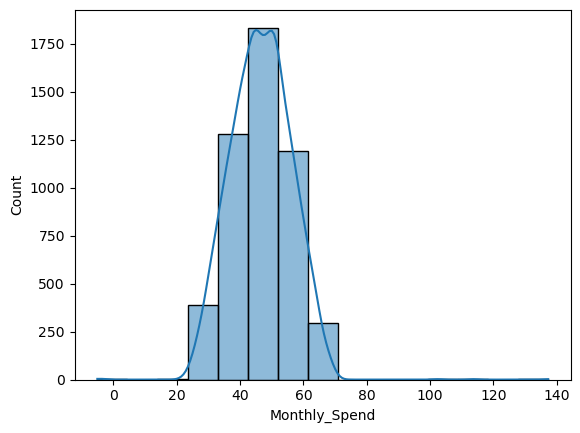

In [26]:
#Plotting a histogram of Monthly spend to view it's ditribution
sns.histplot(stream_df["Monthly_Spend"], bins = 15, kde = True)   

# Simple Linear Regression 

## Age

<Axes: xlabel='Age', ylabel='Count'>

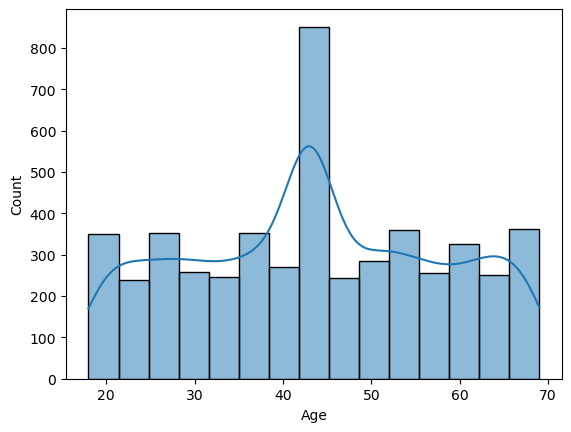

In [29]:
#Plotting an age histogram to visualize the age distribution
sns.histplot(stream_df["Age"], bins = 15, kde = True)

In [30]:
#To get the minimum and maximum value in the age column for reference.
min_sub_length = stream_df['Age'].min()   #Extract minimum Age value
max_sub_length = stream_df['Age'].max()   #Extract maximum Age value
print(f"The min value is: {min_sub_length}")
print(f"The max value is: {max_sub_length}")

The min value is: 18
The max value is: 69


In [31]:
x = stream_df["Age"]               #Extracting the input feature
y = stream_df["Monthly_Spend"]     #Extracting the output feature
x = x.to_numpy().reshape(-1, 1)    #Convert the selected feature column into a 2D NumPy array
#Splitting the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Check the size of the training and testing sets.
print("There are %d data points in the training set." %(len(x_train),))
print("There are %d data points in the testing set." %(len(x_test),))

There are 4000 data points in the training set.
There are 1000 data points in the testing set.


Before building linear and non-linear regression models, I'll define a reusable function that takes a numerical predictor variable as input. This function will handle model fitting, plotting the regression line, and displaying the evaluation metrics.

In [33]:
def run_linear_regression(feature_col, target_col, stream_df, feature_range, title):
   
    x = stream_df[feature_col].to_numpy().reshape(-1, 1)       #Convert the selected feature column into a 2D NumPy array
    y = stream_df[target_col]                                  #Assign the target column (what i'm trying to predict)
    
    #Splitting the data into training and testing sets (80% train, 20% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()                           #Create an instance of the StandardScaler class
    scaler.fit(x)                                       #Fit the standard scaler to the input data that we have in x
    x_train_scaled = scaler.transform(x_train)          #Applying the standard scaler transformation to both sets
    x_test_scaled = scaler.transform(x_test)

    model = LinearRegression()                          #Create an instance of the model.
    model.fit(x_train_scaled, y_train)                  #Fit the model to the training data.

    gradient = model.coef_[0]                           #Get the fit coefficients from the best-fit model.
    intercept = model.intercept_
    print(f"\n{title}")                                 #Print the coefficients.
    print("Gradient (m):", gradient)
    print("Intercept (c):", intercept)

    y_pred = model.predict(x_test_scaled)               #To make predictions on the test set and evaluate performance
    mae = mean_absolute_error(y_test, y_pred)           #Calculate average absolute difference between predictions and actuals
    mse = mean_squared_error(y_test, y_pred)            #Calculate Average squared error
    rmse = np.sqrt(mse)                                 #Calculate squareroot of MSE (in same units as target)
    r2 = r2_score(y_test, y_pred)                       #Calculate r2 score(proportion of variance explained by the model)

    #Print the results of these Evaluation metrics
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R2 Score:", r2)

    #Generate a range of x-values for the regression line. Recall we have extracted the min and max
    #values of the x-values and it will be manually inputed in the function in 'feature_range'
    
    x_fit = np.arange(*feature_range).reshape(-1, 1)         #Create an array of values covering the range and also reshaping to 2D
    x_fit_scaled = scaler.transform(x_fit)                   #Applying standardisation transformation.
    y_fit = model.predict(x_fit_scaled)                      #Applying the trained model to this scaled input array to get y-values.

    sns.scatterplot(data=stream_df, x=feature_col, y=target_col)    #Using seaborn to create a scatterplot of the features
    plt.plot(x_fit, y_fit, color='black')                    #Plot the best-fit line from the trained model
    plt.xlabel(feature_col)                                  #label both axes
    plt.ylabel(f"{target_col} (Pounds)")
    plt.title(title)                                         #Title the plot
    plt.show()                                               #Show the plot


The linear regression function is now defined. Next, I'll iterate through each numerical feature and generate regression plots to analyze their relationship with the target variable.


Age vs Monthly_Spend
Gradient (m): 0.00016010131370277378
Intercept (c): 46.562889083983265
Mean Absolute Error: 7.641335988049989
Mean Squared Error: tf.Tensor(90.48137129471748, shape=(), dtype=float64)
Root Mean Squared Error: 9.512169641817659
R2 Score: -0.0008940218086892493


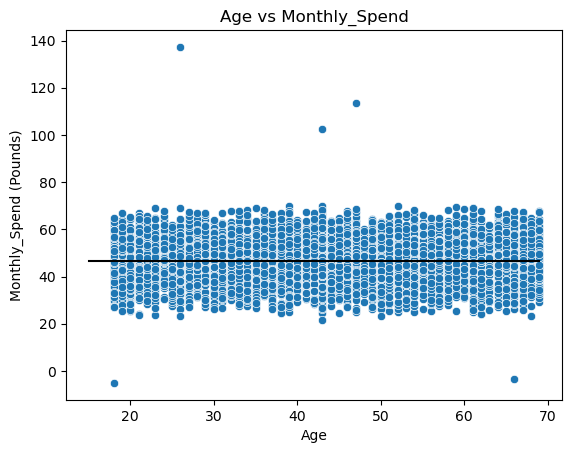

In [35]:
run_linear_regression("Age", "Monthly_Spend", stream_df, (15, 70, 1), "Age vs Monthly_Spend")

## Subscription Length

<Axes: xlabel='Subscription_Length', ylabel='Count'>

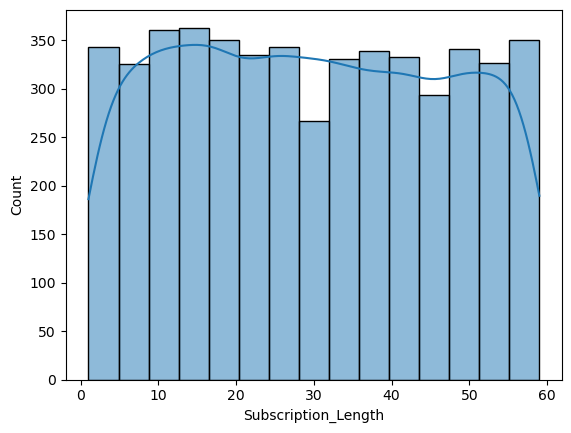

In [37]:
#Plotting a histogram to visualize the subscription length distribution
sns.histplot(stream_df["Subscription_Length"], bins = 15, kde = True)

In [38]:
#To get the minimum and maximum value in the column for reference.
min_sub_length = stream_df['Subscription_Length'].min()    #Calculate min sub length value
max_sub_length = stream_df['Subscription_Length'].max()    #Calculate max sub length value
print(f"The min value is: {min_sub_length}")
print(f"The max value is: {max_sub_length}")

The min value is: 1
The max value is: 59



Subscription Length vs Monthly Spend
Gradient (m): 5.263237406525985
Intercept (c): 46.62676397417948
Mean Absolute Error: 6.642846985599881
Mean Squared Error: tf.Tensor(64.8278293332412, shape=(), dtype=float64)
Root Mean Squared Error: 8.051573096807928
R2 Score: 0.28288236685617885


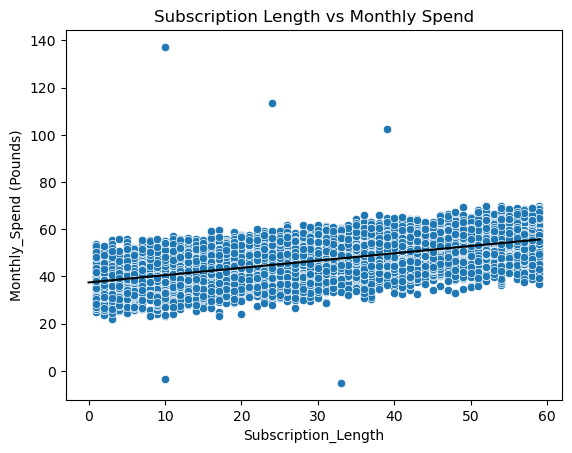

In [39]:
run_linear_regression("Subscription_Length", "Monthly_Spend", stream_df, (0, 60, 1), "Subscription Length vs Monthly Spend")

## Support Ticket Raised

<Axes: xlabel='Support_Tickets_Raised', ylabel='Count'>

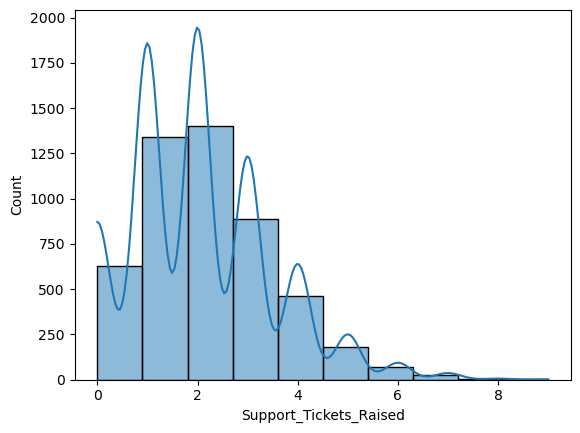

In [41]:
#Plotting a histogram to visualize the support ticket distribution
sns.histplot(stream_df["Support_Tickets_Raised"], bins = 10, kde = True)

In [42]:
#To get the minimum and maximum value in the column for reference.
min_sup_ticket = stream_df['Support_Tickets_Raised'].min()     #Calculate min supp ticket
max_sup_ticket = stream_df['Support_Tickets_Raised'].max()     #Calculate max supp ticket
print(f"The min value is: {min_sup_ticket}")
print(f"The max value is: {max_sup_ticket}")

The min value is: 0
The max value is: 9



Support Tickets Raised vs Monthly Spend
Gradient (m): -1.5775950093188478
Intercept (c): 46.56178078502687
Mean Absolute Error: 7.600180742380477
Mean Squared Error: tf.Tensor(88.79502699716902, shape=(), dtype=float64)
Root Mean Squared Error: 9.423111322549948
R2 Score: 0.01776011552340051


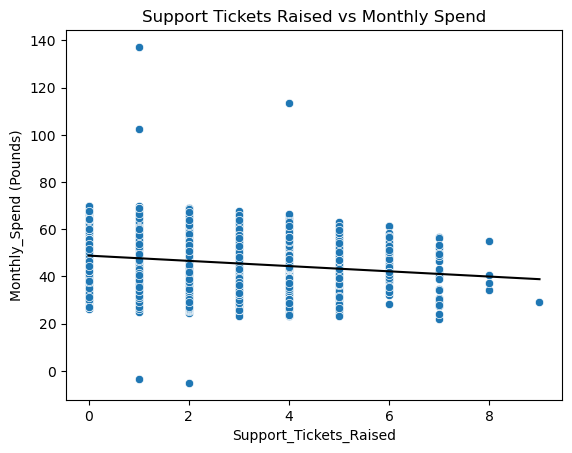

In [43]:
run_linear_regression("Support_Tickets_Raised", "Monthly_Spend", stream_df, (0, 10, 1), "Support Tickets Raised vs Monthly Spend")

## Satisfaction Score

<Axes: xlabel='Satisfaction_Score', ylabel='Count'>

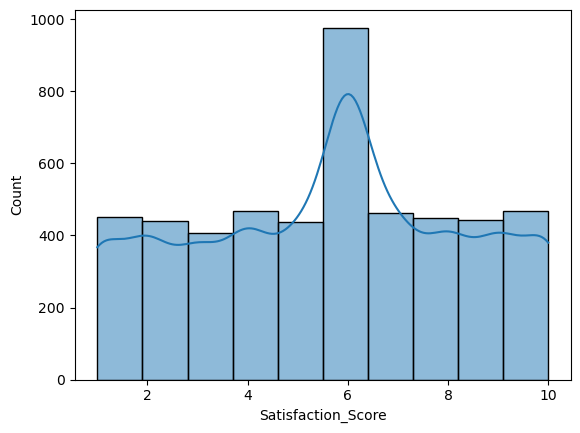

In [45]:
#Plotting a histogram to visualize the satisfaction score distribution
sns.histplot(stream_df["Satisfaction_Score"], bins = 10, kde = True)

In [46]:
#To get the minimum and maximum value in the column for reference.
min_sat_score = stream_df['Satisfaction_Score'].min()     #Calculate min sat score
max_sat_score = stream_df['Satisfaction_Score'].max()     #Calculate max sat score
print(f"The min value is: {min_sat_score}")
print(f"The max value is: {max_sat_score}")

The min value is: 1
The max value is: 10



Satisfaction Score vs Monthly Spend
Gradient (m): 6.870127120861718
Intercept (c): 46.555074874582694
Mean Absolute Error: 5.1603353681596476
Mean Squared Error: tf.Tensor(42.08439881263931, shape=(), dtype=float64)
Root Mean Squared Error: 6.487248940239561
R2 Score: 0.5344674535735892


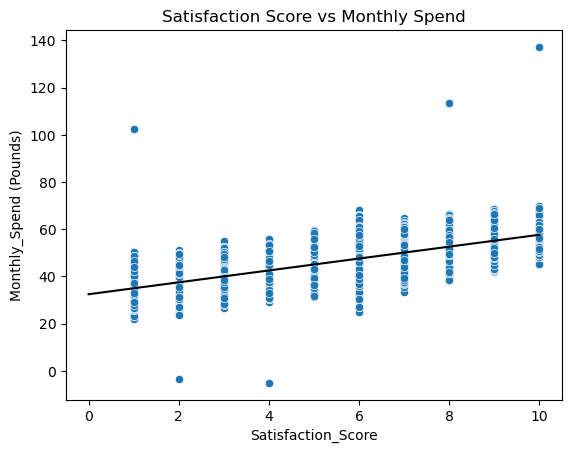

In [47]:
run_linear_regression("Satisfaction_Score", "Monthly_Spend", stream_df, (0, 11, 1), "Satisfaction Score vs Monthly Spend")

## Discount Offered

<Axes: xlabel='Discount_Offered', ylabel='Count'>

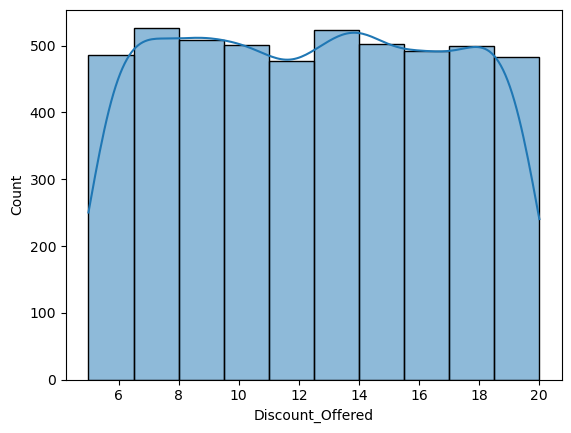

In [49]:
#Plotting a histogram to visualize the satisfaction score distribution
sns.histplot(stream_df["Discount_Offered"], bins = 10, kde = True)

In [50]:
min_disc_offered = stream_df['Discount_Offered'].min()
max_disc_offered = stream_df['Discount_Offered'].max()
print(f"The min value is: {min_disc_offered}")
print(f"The max value is: {max_disc_offered}")

The min value is: 5.0
The max value is: 20.0



Discount Offered vs Monthly Spend
Gradient (m): 2.0729860128482125
Intercept (c): 46.56108372461377
Mean Absolute Error: 7.421163720217704
Mean Squared Error: tf.Tensor(86.36949207328912, shape=(), dtype=float64)
Root Mean Squared Error: 9.293518820839022
R2 Score: 0.044591090455157634


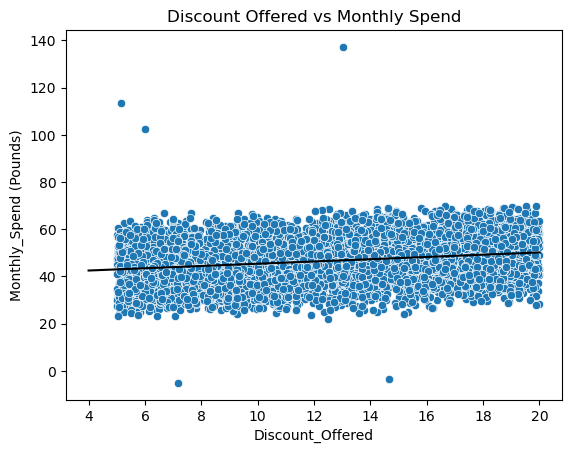

In [51]:
run_linear_regression("Discount_Offered", "Monthly_Spend", stream_df, (4, 21, 1), "Discount Offered vs Monthly Spend")

## Last Activity

<Axes: xlabel='Last_Activity', ylabel='Count'>

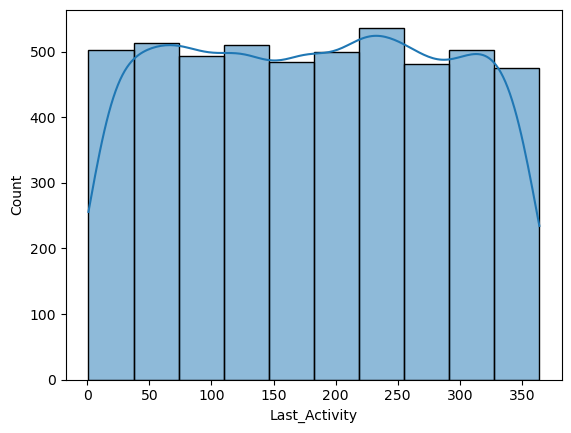

In [53]:
#Plotting a histogram to visualize the last activity distribution
sns.histplot(stream_df["Last_Activity"], bins = 10, kde = True)

In [54]:
min_last_activity = stream_df['Last_Activity'].min()
max_last_activity = stream_df['Last_Activity'].max()
print(f"The min value is: {min_last_activity}")
print(f"The max value is: {max_last_activity}")

The min value is: 1
The max value is: 364



Last Activity vs Monthly Spend
Gradient (m): -0.015436419668541283
Intercept (c): 46.56275772223133
Mean Absolute Error: 7.641969958058715
Mean Squared Error: tf.Tensor(90.49090637496707, shape=(), dtype=float64)
Root Mean Squared Error: 9.512670832892677
R2 Score: -0.0009994977169642816


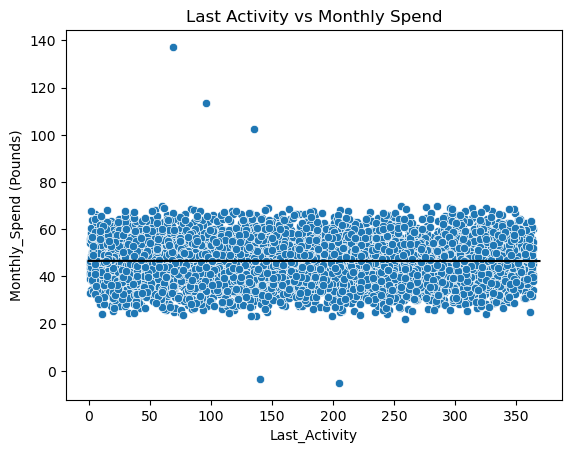

In [55]:
run_linear_regression("Last_Activity", "Monthly_Spend", stream_df, (0, 370, 1), "Last Activity vs Monthly Spend")

# Polynomial Regression

Like in the previous code, I'll define a reusable function that takes a numerical predictor variable as input. This function will handle model fitting, plotting the regression line, and displaying key evaluation metrics.

For this, I will be using a degree of 2.

In [58]:
def run_polynomial_regression(feature_col, target_col, stream_df, feature_range, title, degree=2):
    #
    x = stream_df[feature_col].to_numpy().reshape(-1, 1)              #Convert the selected feature column into a 2D NumPy array
    y = stream_df[target_col]                                         #Assign the target column (what I'm trying to predict)
    
    #Splitting the data into training and testing sets (80% train, 20% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #create a polynomial feature transformer for the specified degree
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)                                    #To transform the full dataset
    x_train_poly = poly.transform(x_train)                            #To transform the training set
    x_test_poly = poly.transform(x_test)                              #To transform the test set

    #To standardise the polynomial features
    scale = StandardScaler()                                          #Creating an Instance of Standard scaler
    scale.fit(x_poly)                                                 #Fit the scaler to the polynomial features
    x_train_scaled = scale.transform(x_train_poly)                    #Scale the training set
    x_test_scaled = scale.transform(x_test_poly)                      #Scale the test set

    model = LinearRegression()                                        #Create an instance of the Linear Regression model
    model.fit(x_train_scaled, y_train)                                #Train the model on the scaled polynomial features

    y_pred = model.predict(x_test_scaled)                             #To make predictions on the test set and evaluate performance

    #Extract model evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)                         #Calculate average absolute difference between predictions and actuals
    mse = mean_squared_error(y_test, y_pred)                          #Calculate Average squared error
    rmse = np.sqrt(mse)                                               #Calculate squareroot of MSE (in same units as target)
    r2 = r2_score(y_test, y_pred)                                     #Calculate r2 score(proportion of variance explained by the model)

    #Print the results of these evaluation metrics
    print(f"\n{title} (Degree {degree})")
    print("Coefficients:", model.coef_)                               #Print the coefficients
    print("Intercept:", model.intercept_)                             #Print the Intercept
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R2 Score:", r2)

    #Prepare a smooth curve for plotting the polynomial regression line
    x_fit = np.arange(*feature_range).reshape(-1, 1)                    #To create an array of evenly spaced range of values
    x_fit_poly = poly.transform(x_fit)                                  #Apply the standardization transformation 
    x_fit_scaled = scale.transform(x_fit_poly)                          #Apply the same scaling as training data
    y_fit = model.predict(x_fit_scaled)                                 #Apply the trained model to this scaled input array to get y-values.

    sns.scatterplot(data=stream_df, x=feature_col, y=target_col)        #Using seaborn to create a scatterplot of the features
    plt.plot(x_fit, y_fit, color='black')                               #Plot the best fit line from the trained model
    plt.xlabel(feature_col)                                             #Label both axes
    plt.ylabel(f"{target_col} (Pounds)")
    plt.title(f"{title} (Degree {degree})")                             #Title the plot
    plt.show()                                                          #Show the plot

## Age


Age vs Monthly Spend (Degree 2)
Coefficients: [ 0.          0.118313   -0.11963473]
Intercept: 46.563224959558255
Mean Absolute Error: 7.641333883970188
Mean Squared Error: tf.Tensor(90.47172588759824, shape=(), dtype=float64)
Root Mean Squared Error: 9.511662624777975
R2 Score: -0.0007873254778816285


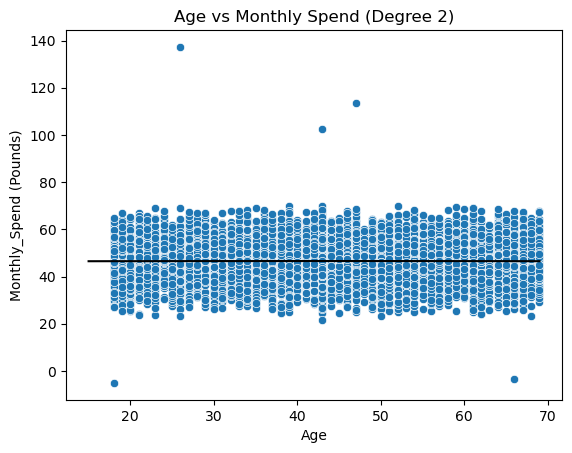

In [60]:
run_polynomial_regression("Age", "Monthly_Spend", stream_df, (15, 70, 1), "Age vs Monthly Spend", degree=2)

## Subscription Length


Subscription Length vs Monthly Spend (Degree 2)
Coefficients: [0.        4.8276862 0.4503448]
Intercept: 46.62781272587006
Mean Absolute Error: 6.645539420307652
Mean Squared Error: tf.Tensor(64.90630095376106, shape=(), dtype=float64)
Root Mean Squared Error: 8.05644468445983
R2 Score: 0.28201432324967624


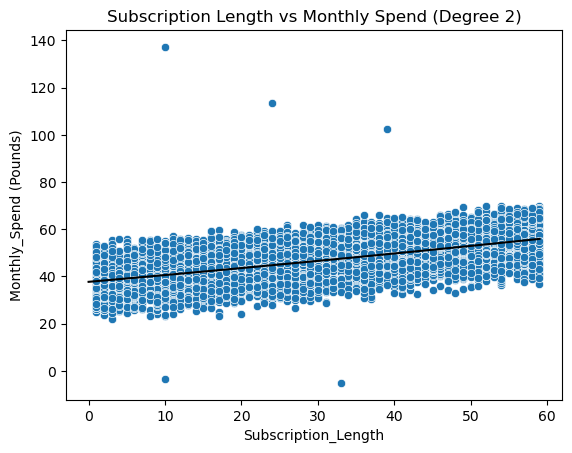

In [62]:
run_polynomial_regression("Subscription_Length", "Monthly_Spend", stream_df, (0, 60, 1), "Subscription Length vs Monthly Spend", degree=2)

## Support Tickets Raised


Support Tickets Raised vs Monthly Spend (Degree 2)
Coefficients: [ 0.         -2.23895944  0.71143811]
Intercept: 46.56001978974884
Mean Absolute Error: 7.605874139064931
Mean Squared Error: tf.Tensor(88.91871017128355, shape=(), dtype=float64)
Root Mean Squared Error: 9.429671795523085
R2 Score: 0.016391947161248477


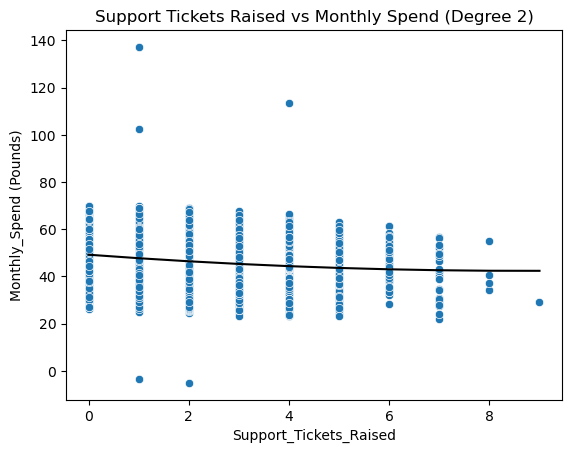

In [64]:
run_polynomial_regression("Support_Tickets_Raised", "Monthly_Spend", stream_df, (0, 10, 1), "Support Tickets Raised vs Monthly Spend", degree=2)

## Satisfaction Score


Satisfaction Score vs Monthly Spend (Degree 2)
Coefficients: [0.         6.23297648 0.65723308]
Intercept: 46.55593198572523
Mean Absolute Error: 5.161274443263781
Mean Squared Error: tf.Tensor(42.07980871270454, shape=(), dtype=float64)
Root Mean Squared Error: 6.486895151974058
R2 Score: 0.5345182287057351


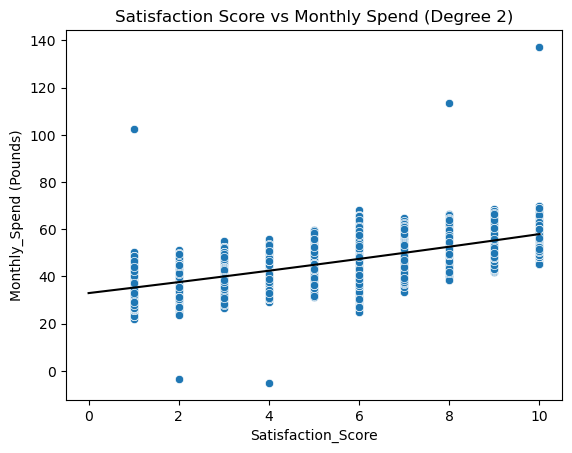

In [66]:
run_polynomial_regression("Satisfaction_Score", "Monthly_Spend", stream_df, (0, 11, 1), "Satisfaction Score vs Monthly Spend", degree=2)

## Discount Offered


Discount Offered vs Monthly Spend (Degree 2)
Coefficients: [ 0.          2.29309361 -0.22286247]
Intercept: 46.560734319035824
Mean Absolute Error: 7.421170990665346
Mean Squared Error: tf.Tensor(86.36946018286791, shape=(), dtype=float64)
Root Mean Squared Error: 9.293517105104392
R2 Score: 0.04459144322315267


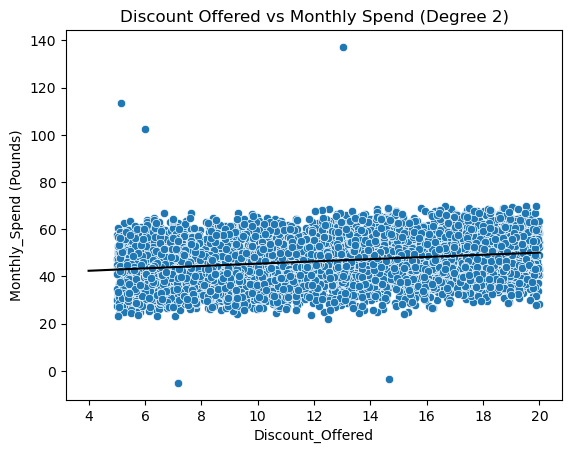

In [68]:
run_polynomial_regression("Discount_Offered", "Monthly_Spend", stream_df, (4, 21, 1), "Discount Offered vs Monthly Spend", degree=2)

## Last Activity


Last Activity vs Monthly Spend (Degree 2)
Coefficients: [ 0.         -0.09153748  0.07875947]
Intercept: 46.56267767490543
Mean Absolute Error: 7.641044491414199
Mean Squared Error: tf.Tensor(90.48409695250672, shape=(), dtype=float64)
Root Mean Squared Error: 9.512312912878063
R2 Score: -0.0009241727065776306


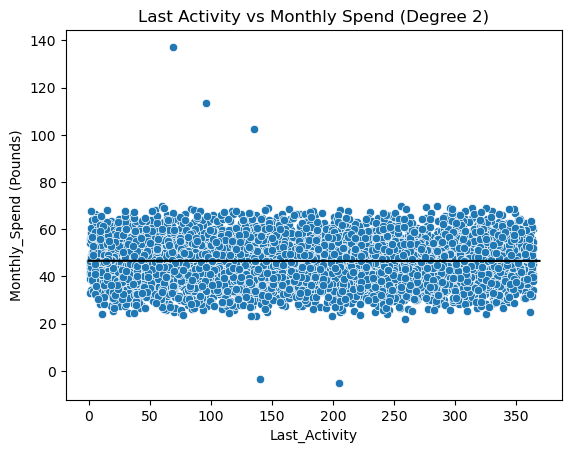

In [70]:
run_polynomial_regression("Last_Activity", "Monthly_Spend", stream_df, (0, 370, 1), "Last Activity vs Monthly Spend", degree=2)

# Multiple Linear Regression Model

(b) Now I will consider regression models that take multiple numerical variables as input features to 
predict "Monthly Spend". I will observe if  including multiple features improve prediction accuracy 
compared to single-variable models

For a multiple linear regression model, I'll define a reusable function that takes multiple numerical predictor variables as input. This function will handle the model fitting, plotting the regression plane, and displaying key evaluation metrics.

In [74]:
def run_multiple_linear_regression(feature_cols, target_col, stream_df, title="Multiple Linear Regression"):
   
    X = stream_df[feature_cols]                                #Extract the selected input features
    y = stream_df[target_col]                                  #Extract the selected output features

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Standardize features
    scale = StandardScaler()                                   #Create an instance of standardscaler
    scale.fit(X)                                               #Fit the standard scaler to the input data that we have in x_train
    X_train_scaled = scale.transform(X_train)                  #Scale the training set
    X_test_scaled = scale.transform(X_test)                    #Scale the test set
    
    model = LinearRegression()                                 #Create an instance of the Linear Regression model
    model.fit(X_train_scaled, y_train)                         #Train the model on the scaled polynomial features

    #Print the intercept and coefficients for each feature in the model
    print(f"\n{title}")
    print("Intercept:", model.intercept_)
    for feature, coef in zip(feature_cols, model.coef_):
        print(f"Coefficient for {feature}: {coef}")

    y_pred = model.predict(X_test_scaled)                       #To make predictions on the test set and evaluate performance
    mae = mean_absolute_error(y_test, y_pred)                   #Calculate average absolute difference between predictions and actuals
    mse = mean_squared_error(y_test, y_pred)                    #Calculate Average squared error
    rmse = np.sqrt(mse)                                         #Calculate squareroot of MSE (in same units as target)
    r2 = r2_score(y_test, y_pred)                               #Calculate r2 score(proportion of variance explained by the model)
    
    plt.scatter(y_test, y_pred, color='blue')                   #Using seaborn to create a scatterplot of the features
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')  #Plot the best fit line from the trained model
    plt.xlabel('Actual Values')                                 #Label both axes
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')                     #Title the plot
    plt.show()                                                  #Show the plot

    #Print the results of these evaluation metrics
    print("\nMean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R2 Score:", r2)


Predicting Monthly Spend from All Features
Intercept: 46.61415144894605
Coefficient for Age: 0.005132554797559574
Coefficient for Subscription_Length: 5.168998126301729
Coefficient for Support_Tickets_Raised: -1.7566942138404726
Coefficient for Satisfaction_Score: 6.823686207133191
Coefficient for Discount_Offered: 2.1256592332609108
Coefficient for Last_Activity: -0.0688366394859186


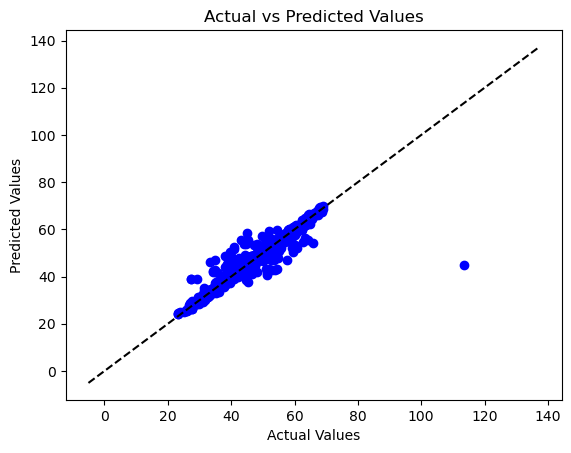


Mean Absolute Error: 1.3584760258044812
Mean Squared Error: tf.Tensor(10.294503750731106, shape=(), dtype=float64)
Root Mean Squared Error: 3.208504908946082
R2 Score: 0.8861234405032117


In [75]:
feature_columns = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
run_multiple_linear_regression(feature_columns, "Monthly_Spend", stream_df, title="Predicting Monthly Spend from All Features")

# Random Forest Regression

(c) In parts (a) and (b), I only considered numerical variables as input. However, several 
categorical variables (e.g., Gender, Region, Payment_Method) might also affect Monthly 
Spend. Now I will train a regression model that uses both categorical and numerical variables (e.g., 
a Random Forest Regressor). And i will check if this improve the model’s performance.

In [78]:
def run_random_forest_regression(feature_cols, target_col, stream_df, title="Random Forest Regression", n_estimators=100, max_depth=None):
    
    X = stream_df[feature_cols]                                                         #Extract the selected input features
    y = stream_df[target_col]                                                           #Extract the selected output features

    X = pd.get_dummies(X, drop_first=True)                                              #To one-hot encode categorical variables

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)                                                         #Fit the model to the training data

    #Predict and evaluate
    y_pred = model.predict(X_test)                                                      #To make predictions on the test set and evaluate performance
    mae = mean_absolute_error(y_test, y_pred)                                           #Calculate average absolute difference between predictions and actuals
    mse = mean_squared_error(y_test, y_pred)                                            #Calculate Average squared error
    rmse = np.sqrt(mse)                                                                 #Calculate squareroot of MSE (in same units as target)
    r2 = r2_score(y_test, y_pred)                                                       #Calculate r2 score(proportion of variance explained by the model)

    #Print evaluation metrics
    print(f"\n{title}")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R2 Score:", r2)

    importances = model.feature_importances_                                            #Extract feature importance scores
    feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)  #Create a sorted series of feature importances

    plt.figure(figsize=(10, 6))                                                         #Set the plot size
    sns.barplot(x=feature_imp, y=feature_imp.index)                                     #Create a barplot of feature importances
    plt.title("Feature Importances")                                                    #Add a title to the plot
    plt.xlabel("Importance Score")                                                      #Label the x-axis
    plt.ylabel("Features")                                                              #Label the y-axis
    plt.tight_layout()                                                                  #Ensure layout looks clean
    plt.show()                                                                          #Display the feature importance plot

    
    plt.figure(figsize=(11, 6))                                                         #Set the plot size
    plt.scatter(y_test, y_pred)                                                         #Create a scatter plot of actual vs predicted values
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')             #Plot a reference line (y = x)
    plt.xlabel("Actual")                                                                #Label the x-axis
    plt.ylabel("Predicted")                                                             #Label the y-axis
    plt.title("Actual vs Predicted")                                                    #Add a title to the plot
    plt.tight_layout()                                                                  #Ensure layout looks clean
    plt.show()                                                                          #Show plot



Random Forest Regression
Mean Absolute Error: 1.8217497000000016
Mean Squared Error: tf.Tensor(12.147400297550009, shape=(), dtype=float64)
Root Mean Squared Error: 3.4853120803666933
R2 Score: 0.8656269222674268


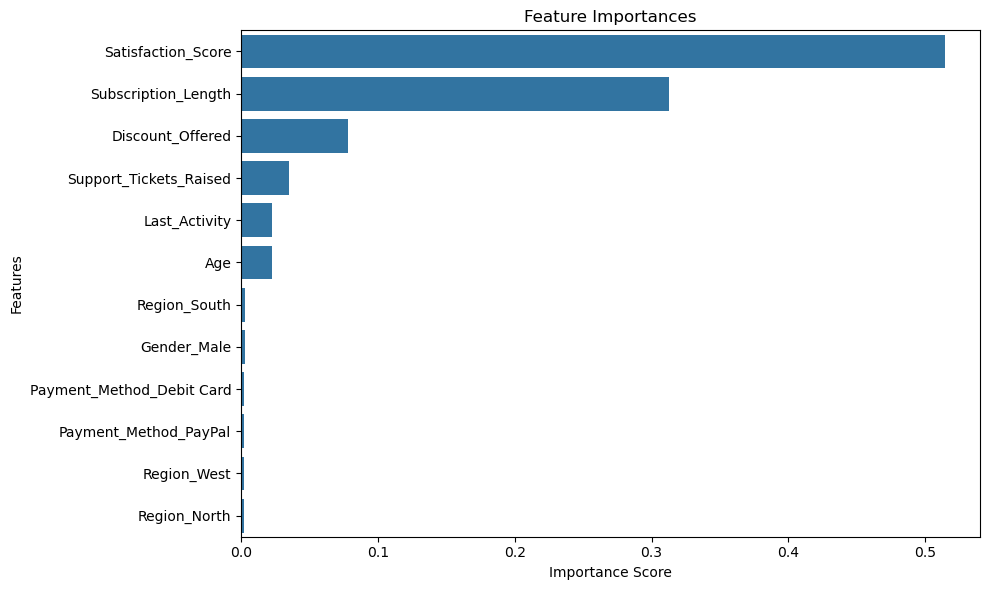

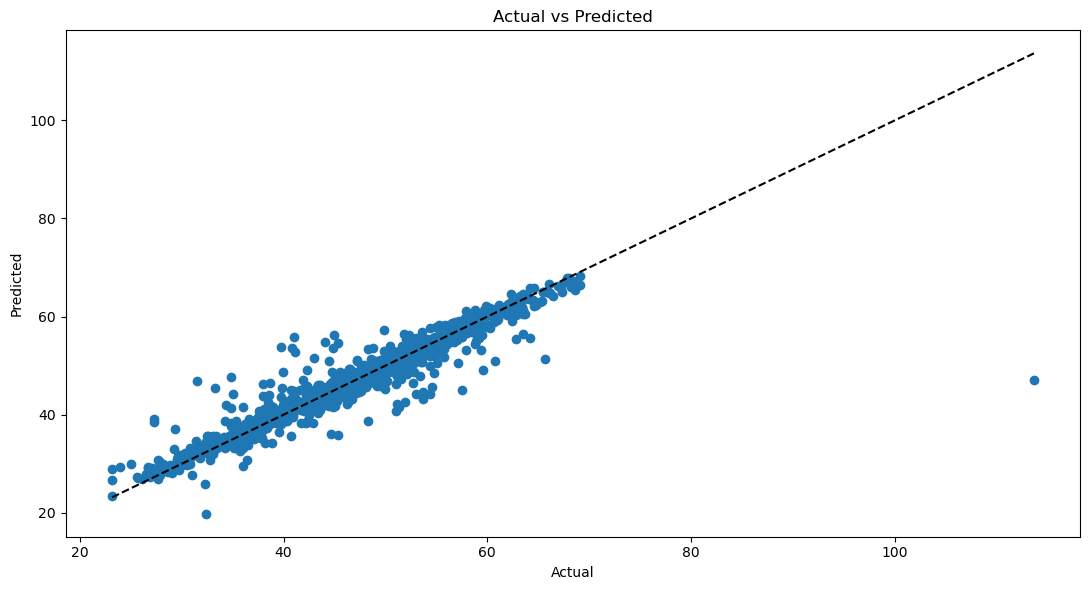

In [79]:
feature_cols = [
    "Age", 
    "Subscription_Length", 
    "Support_Tickets_Raised", 
    "Satisfaction_Score", 
    "Discount_Offered", 
    "Last_Activity", 
    "Gender",              
    "Region",              
    "Payment_Method"       
]

target_col = "Monthly_Spend"

run_random_forest_regression(feature_cols, target_col, stream_df)


This slightly improved performance over the previous model suggests that incorporating categorical variables did help enhance prediction accuracy.

# ANN

(d) Now I will develop an Artificial Neural Network (ANN) model to predict Monthly Spend based on all 
available features in the dataset. I will check its performance compare to other supervised 
learning models.
I will define a function for this process so tuning hyperparameters would be easier.

In [83]:
def train_ann_model(stream_df, target_col='Monthly_Spend', epochs=200, patience=20, dropout_rate=0.2, learning_rate=0.001, layer_sizes=[64, 64]):

    #Define the feature columns to be used for prediction
    feature_col = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", 
                   "Last_Activity", "Gender", "Region", "Payment_Method"]

    X = stream_df[feature_col]                                            #Extract the selected input features
    y = stream_df[target_col]                                             #Extract the selected output features

    #Define categorical and numerical columns
    categorical_cols = ["Gender", "Region", "Payment_Method"]
    numerical_cols = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

    preprocessor = ColumnTransformer(                                      #Preprocess the data using ColumnTransformer
        transformers=[
            ('num', MinMaxScaler(), numerical_cols),                       #Scale numerical columns
            ('cat', OneHotEncoder(drop='first'), categorical_cols)         #One-hot encode categorical columns
        ]
    )

    X = preprocessor.fit_transform(X)                                      #Transform features

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #ANN model
    model = Sequential()                                                   #Create an instance of sequential
    model.add(Input(shape=(X_train.shape[1],)))                            #Input shape based on preprocessed features
    model.add(Dense(layer_sizes[0], activation='relu'))                    #Add the first hidden layer with ReLU activation
    model.add(Dropout(dropout_rate))                                       #Add a dropout layer to help prevent overfitting
    
    for size in layer_sizes[1:]:                                           #Add additional hidden layers dynamically based on layer_sizes
        model.add(Dense(size, activation='relu'))
            
    model.add(Dense(1, activation='linear'))                               #Add the output layer with a single neuron for regression (linear activation)
    model.summary()                                                        #Print a summary of the model

   
    optimizer = Adam(learning_rate=learning_rate)                          #Define the optimizer with custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

    early_stop = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)             #Monitor validation loss for early stopping
                                                                                                             #Stop training if no improvement after 'patience' epochs
                                                                                                             #Restore weights from the best epoch
    #Training the model
    history = model.fit(x=X_train, y=y_train, validation_split=0.2,                                          #Fit the model with early stopping
                        epochs=epochs, callbacks=[early_stop], verbose="auto")

    y_pred = model.predict(X_test).flatten()                               #Predict the model outputs for the testing set and flatten

    plt.figure(figsize=(8, 6), dpi=300)                                    #Set plot size and resolution
    sns.scatterplot(x=y_test, y=y_pred)                                    #Scatter plot of actual vs predicted values
    plt.plot([y_test.min(), y_test.max()],                                 #Add reference line (y = x)
             [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Monthly Spend")                                     #Label x-axis
    plt.ylabel("Predicted Monthly Spend")                                  #Label y-axis
    plt.title("Actual vs Predicted Monthly Spend (ANN)")                   #Add title to the plot
    plt.show()

    
    plt.figure(figsize=(8, 6), dpi=300)                                   #Set plot size and resolution
    plt.plot(history.history['loss'], label='Training Loss')              #Plot training loss
    plt.plot(history.history['val_loss'], label='Validation Loss')        #Plot validation loss
    plt.xlabel("Epoch")                                                   #Label x-axis
    plt.ylabel("Loss (MSE)")                                              #Label y-axis
    plt.title("Training vs Validation Loss")                              #Add title to the plot
    plt.legend()                                                          #Add legend to plot
    plt.show()

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)                             #Calculate average absolute difference between predictions and actuals
    mse = mean_squared_error(y_test, y_pred)                              #Calculate Average squared error
    rmse = np.sqrt(mse)                                                   #Calculate squareroot of MSE (in same units as target)
    r2 = r2_score(y_test, y_pred)                                         #Calculate r2 score(proportion of variance explained by the model)

    #Print metrics
    print("\nEvaluation Metrics")
    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    return model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1888.9884 - mean_absolute_error: 41.9938 - mean_squared_error: 1888.9884 - val_loss: 81.7101 - val_mean_absolute_error: 7.2652 - val_mean_squared_error: 81.7101
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 89.6198 - mean_absolute_error: 7.5334 - mean_squared_error: 89.6198 - val_loss: 48.8141 - val_mean_absolute_error: 5.5545 - val_mean_squared_error: 48.8141
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 57.5063 - mean_absolute_error: 5.9328 - mean_squared_error: 57.5063 - val_loss: 26.3654 - val_mean_absolute_error: 3.8721 - val_mean_squared_error: 26.3654
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36.2689 - mean_absolute_error: 4.4717 - mean_squared_error: 36.2689 - val_loss: 15.9480 - val_mean_absolute_error: 2.7908 - val_mean_squared_error: 15.9480
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.6545 - mean_absolute_error: 3.8780 - mean_squared_error: 27.654

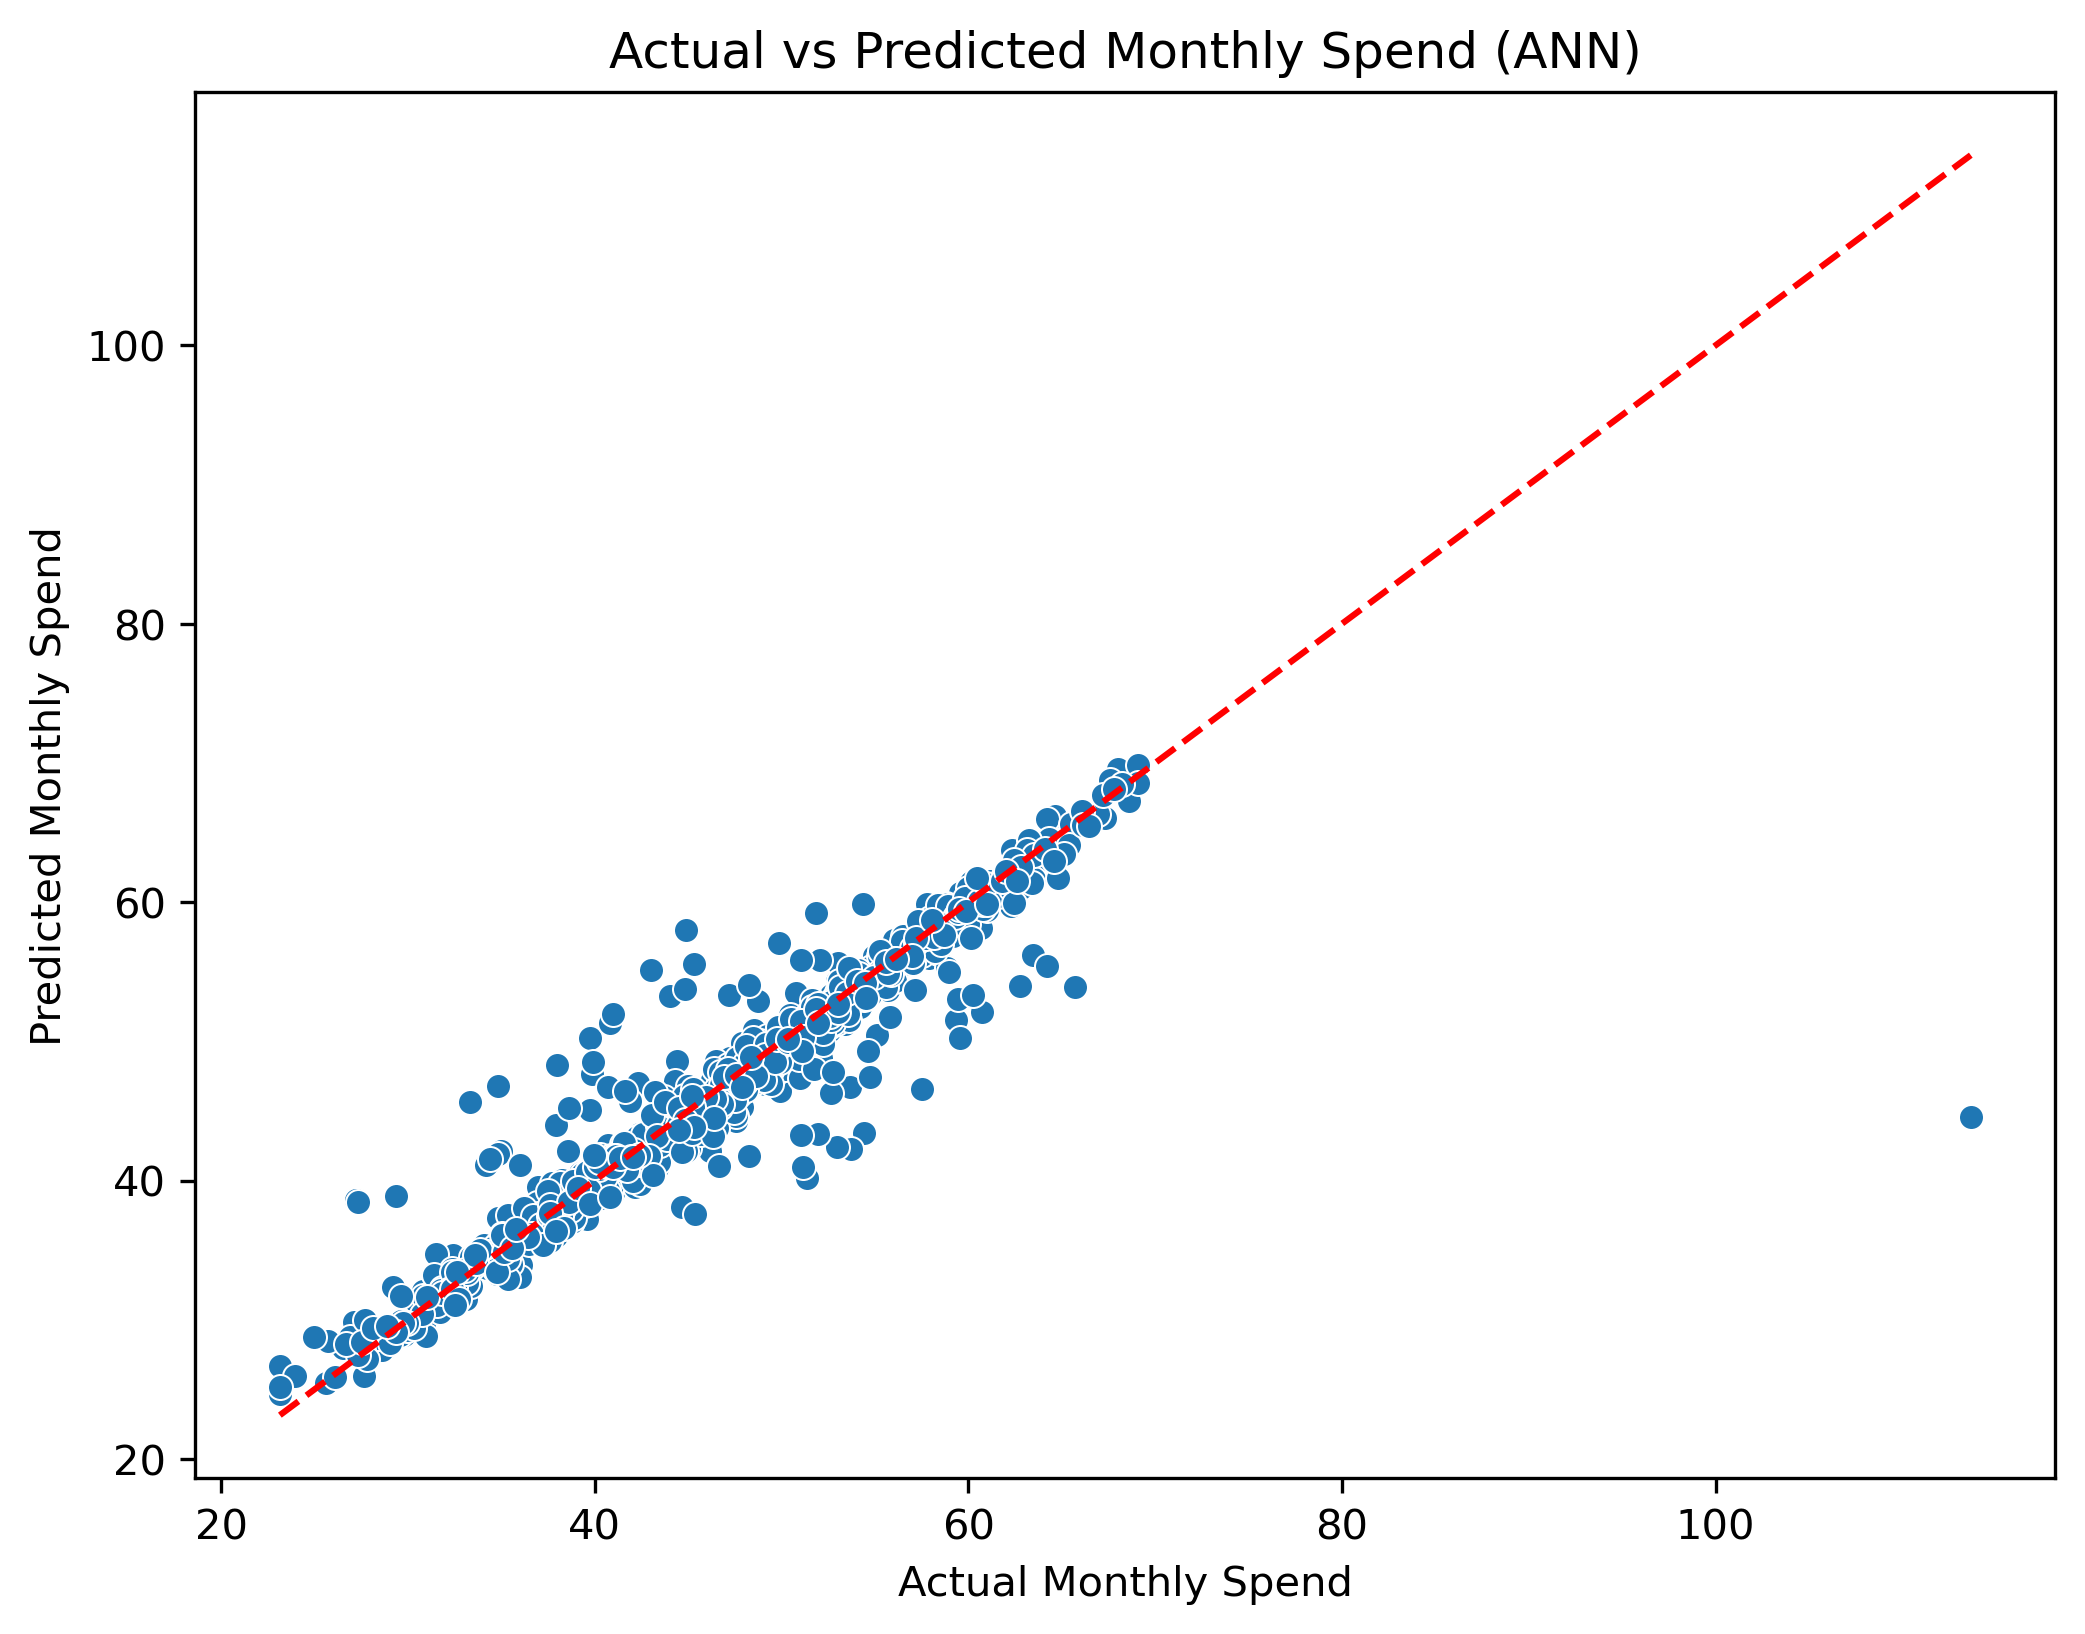

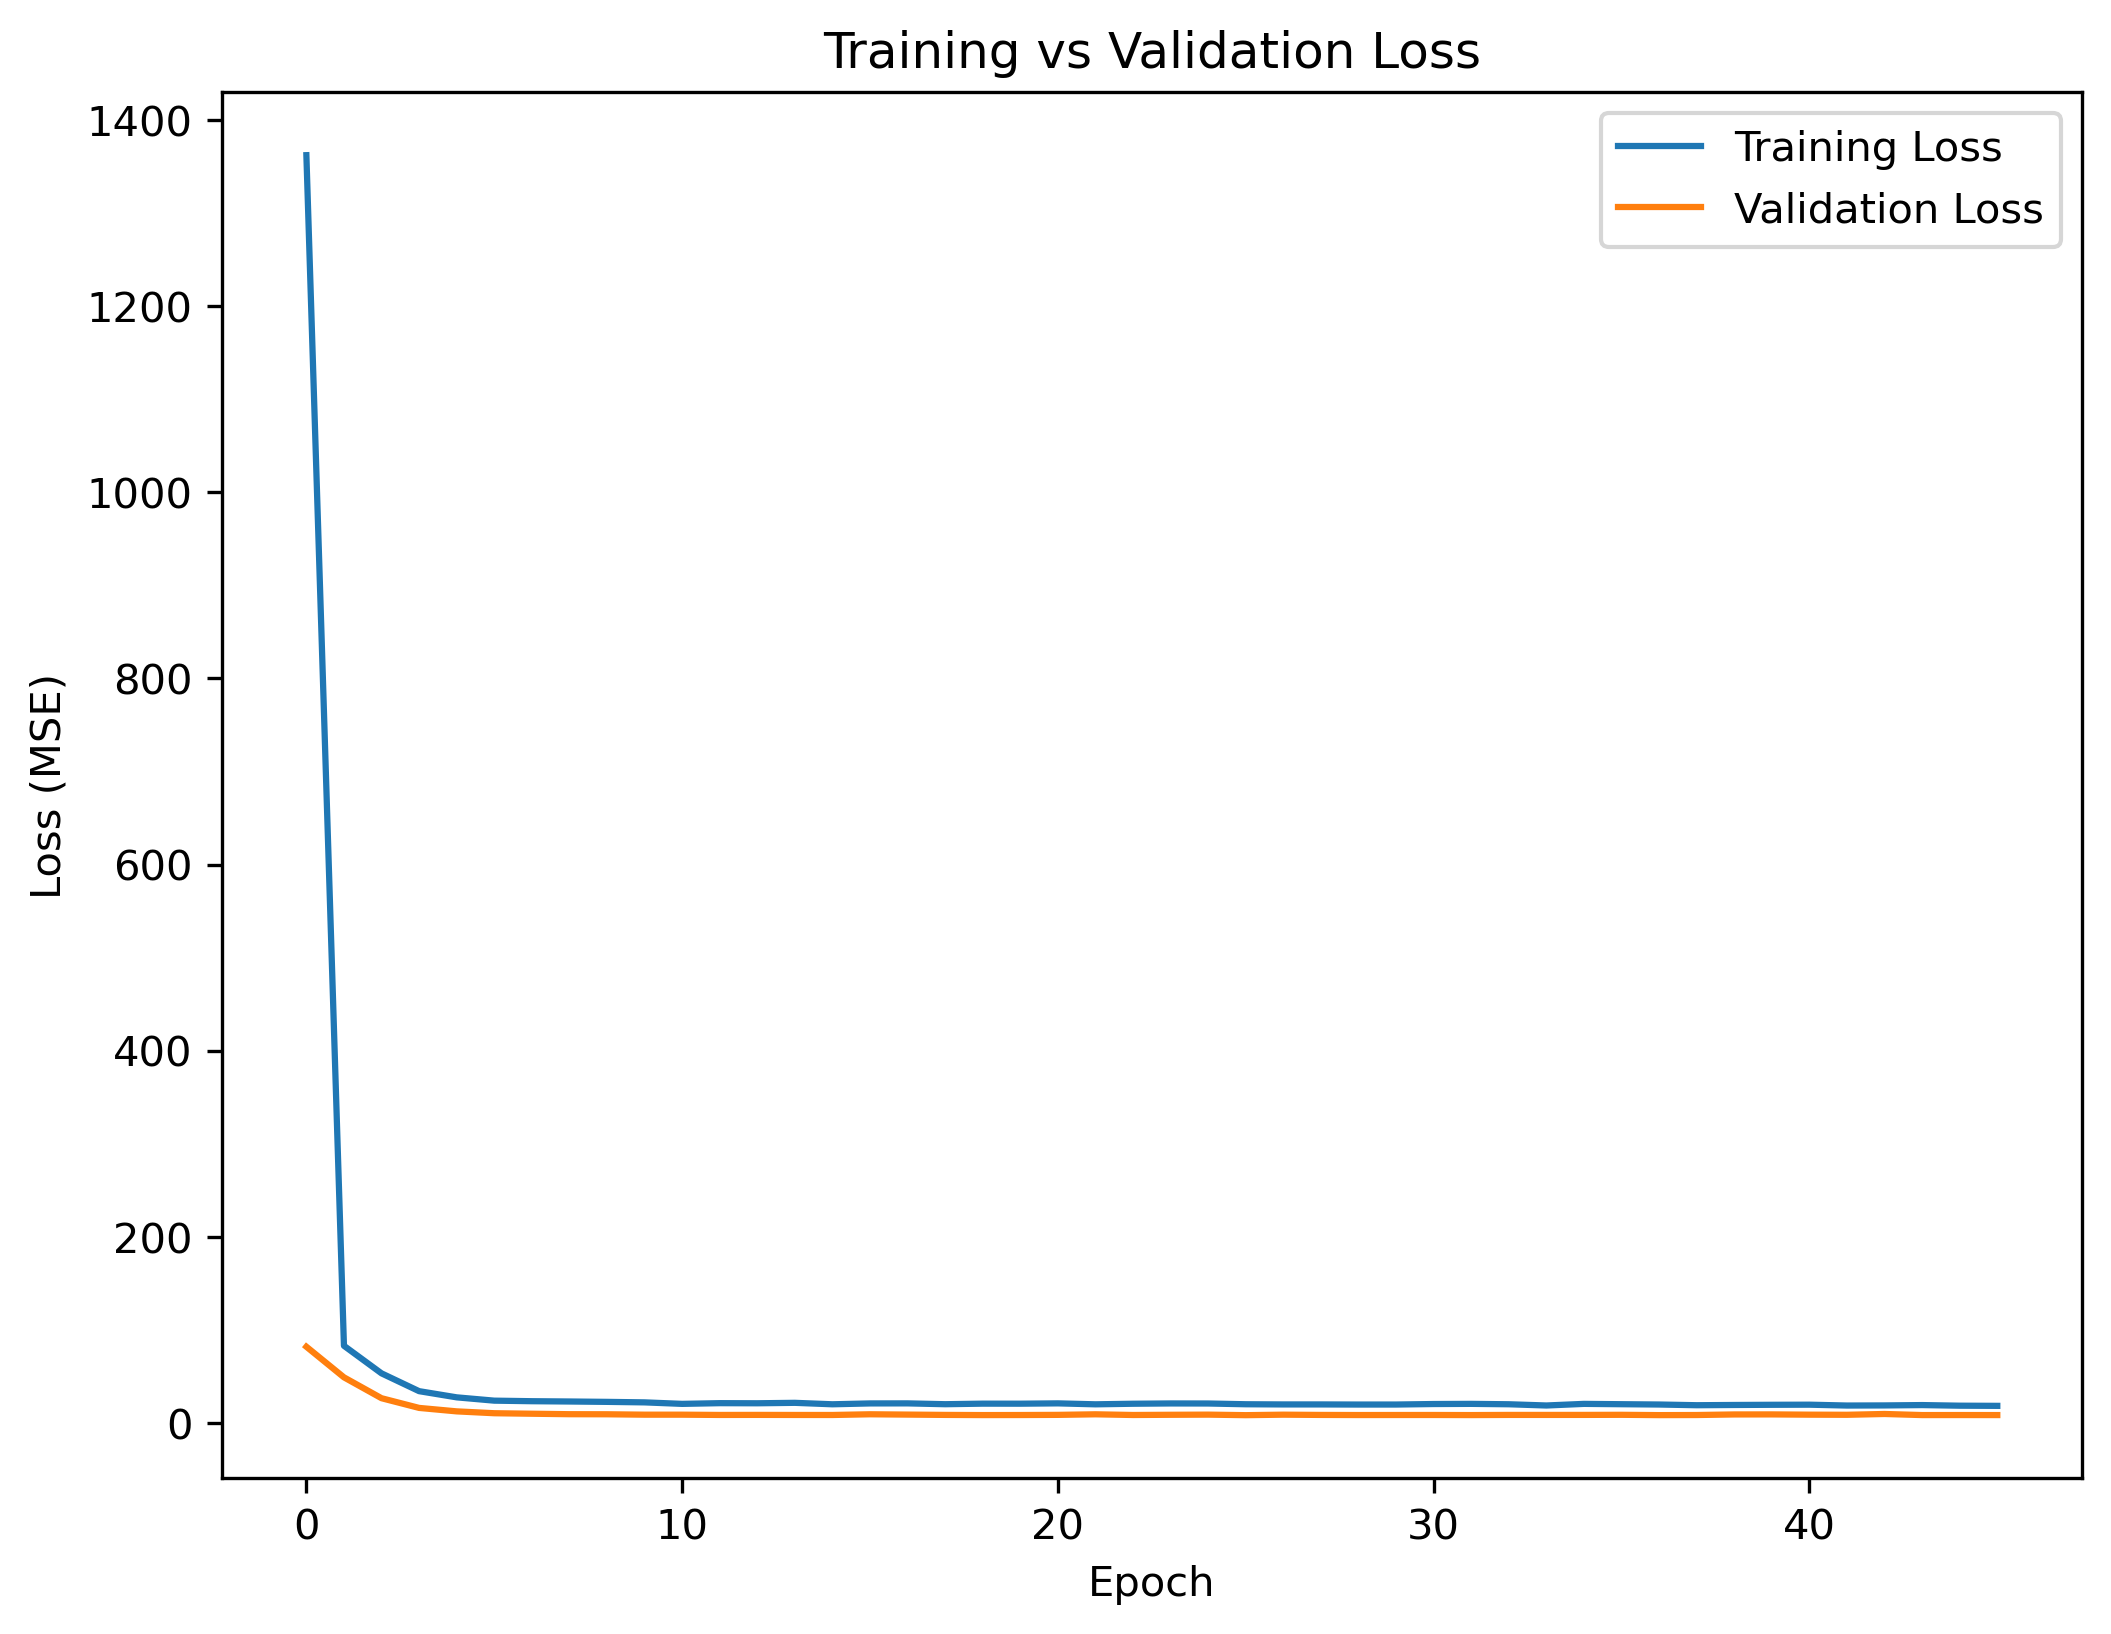


Evaluation Metrics
MAE: 1.4159 | MSE: 10.4707 | RMSE: 3.2359 | R²: 0.8842


<Sequential name=sequential, built=True>

In [84]:
train_ann_model(
    stream_df,
    target_col='Monthly_Spend',
    epochs=200,
    patience=20,
    dropout_rate=0.2,
    learning_rate=0.001,
    layer_sizes=[64, 64]
)

## Hyperparameter Tunings

### Adding extra layer

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,217 (36.00 KB)

 Trainable params: 9,217 (36.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1671.4316 - mean_absolute_error: 38.0298 - mean_squared_error: 1671.4316 - val_loss: 71.4807 - val_mean_absolute_error: 6.7986 - val_mean_squared_error: 71.4807
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 83.3558 - mean_absolute_error: 6.9404 - mean_squared_error: 83.3558 - val_loss: 32.8460 - val_mean_absolute_error: 4.4272 - val_mean_squared_error: 32.8460
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.1481 - mean_absolute_error: 4.9639 - mean_squared_error: 45.1481 - val_loss: 14.8960 - val_mean_absolute_error: 2.6145 - val_mean_squared_error: 14.8960
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.9729 - mean_absolute_error: 3.9773 - mean_squared_error: 27.9729 - val_loss: 10.7220 - val_mean_absolute_error: 1.9904 - val_mean_squared_error: 10.7220
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25.4706 - mean_absolute_error: 3.5968 - mean_squared_error: 25.47

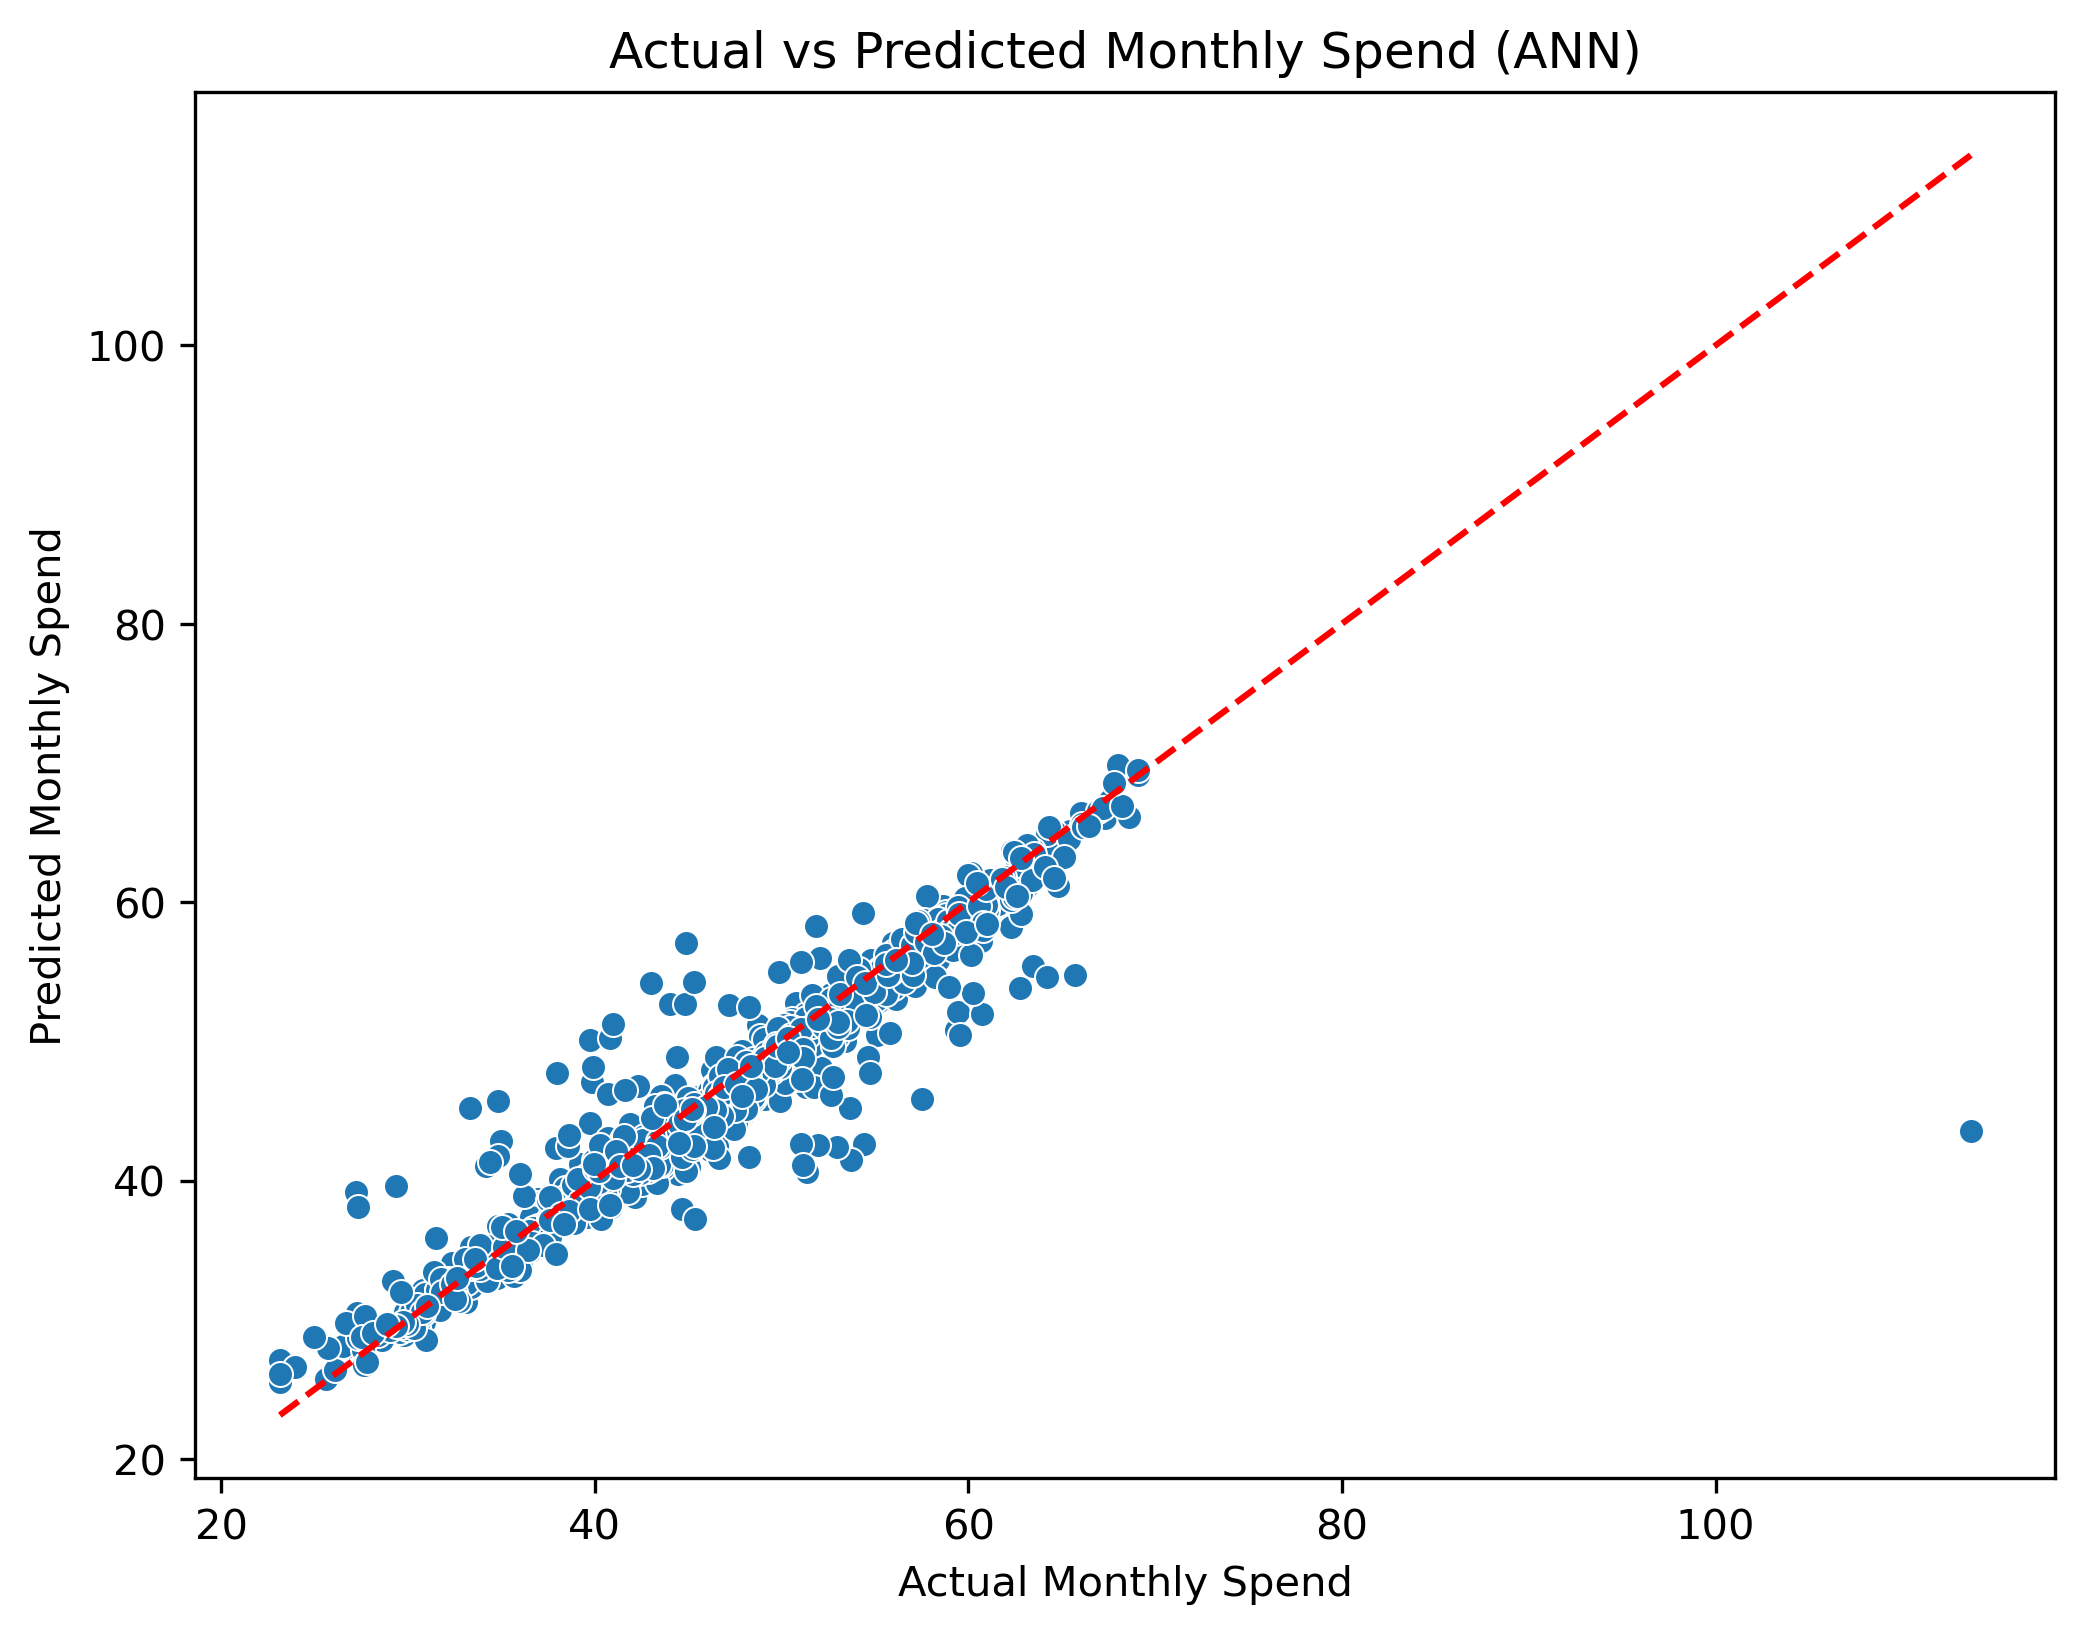

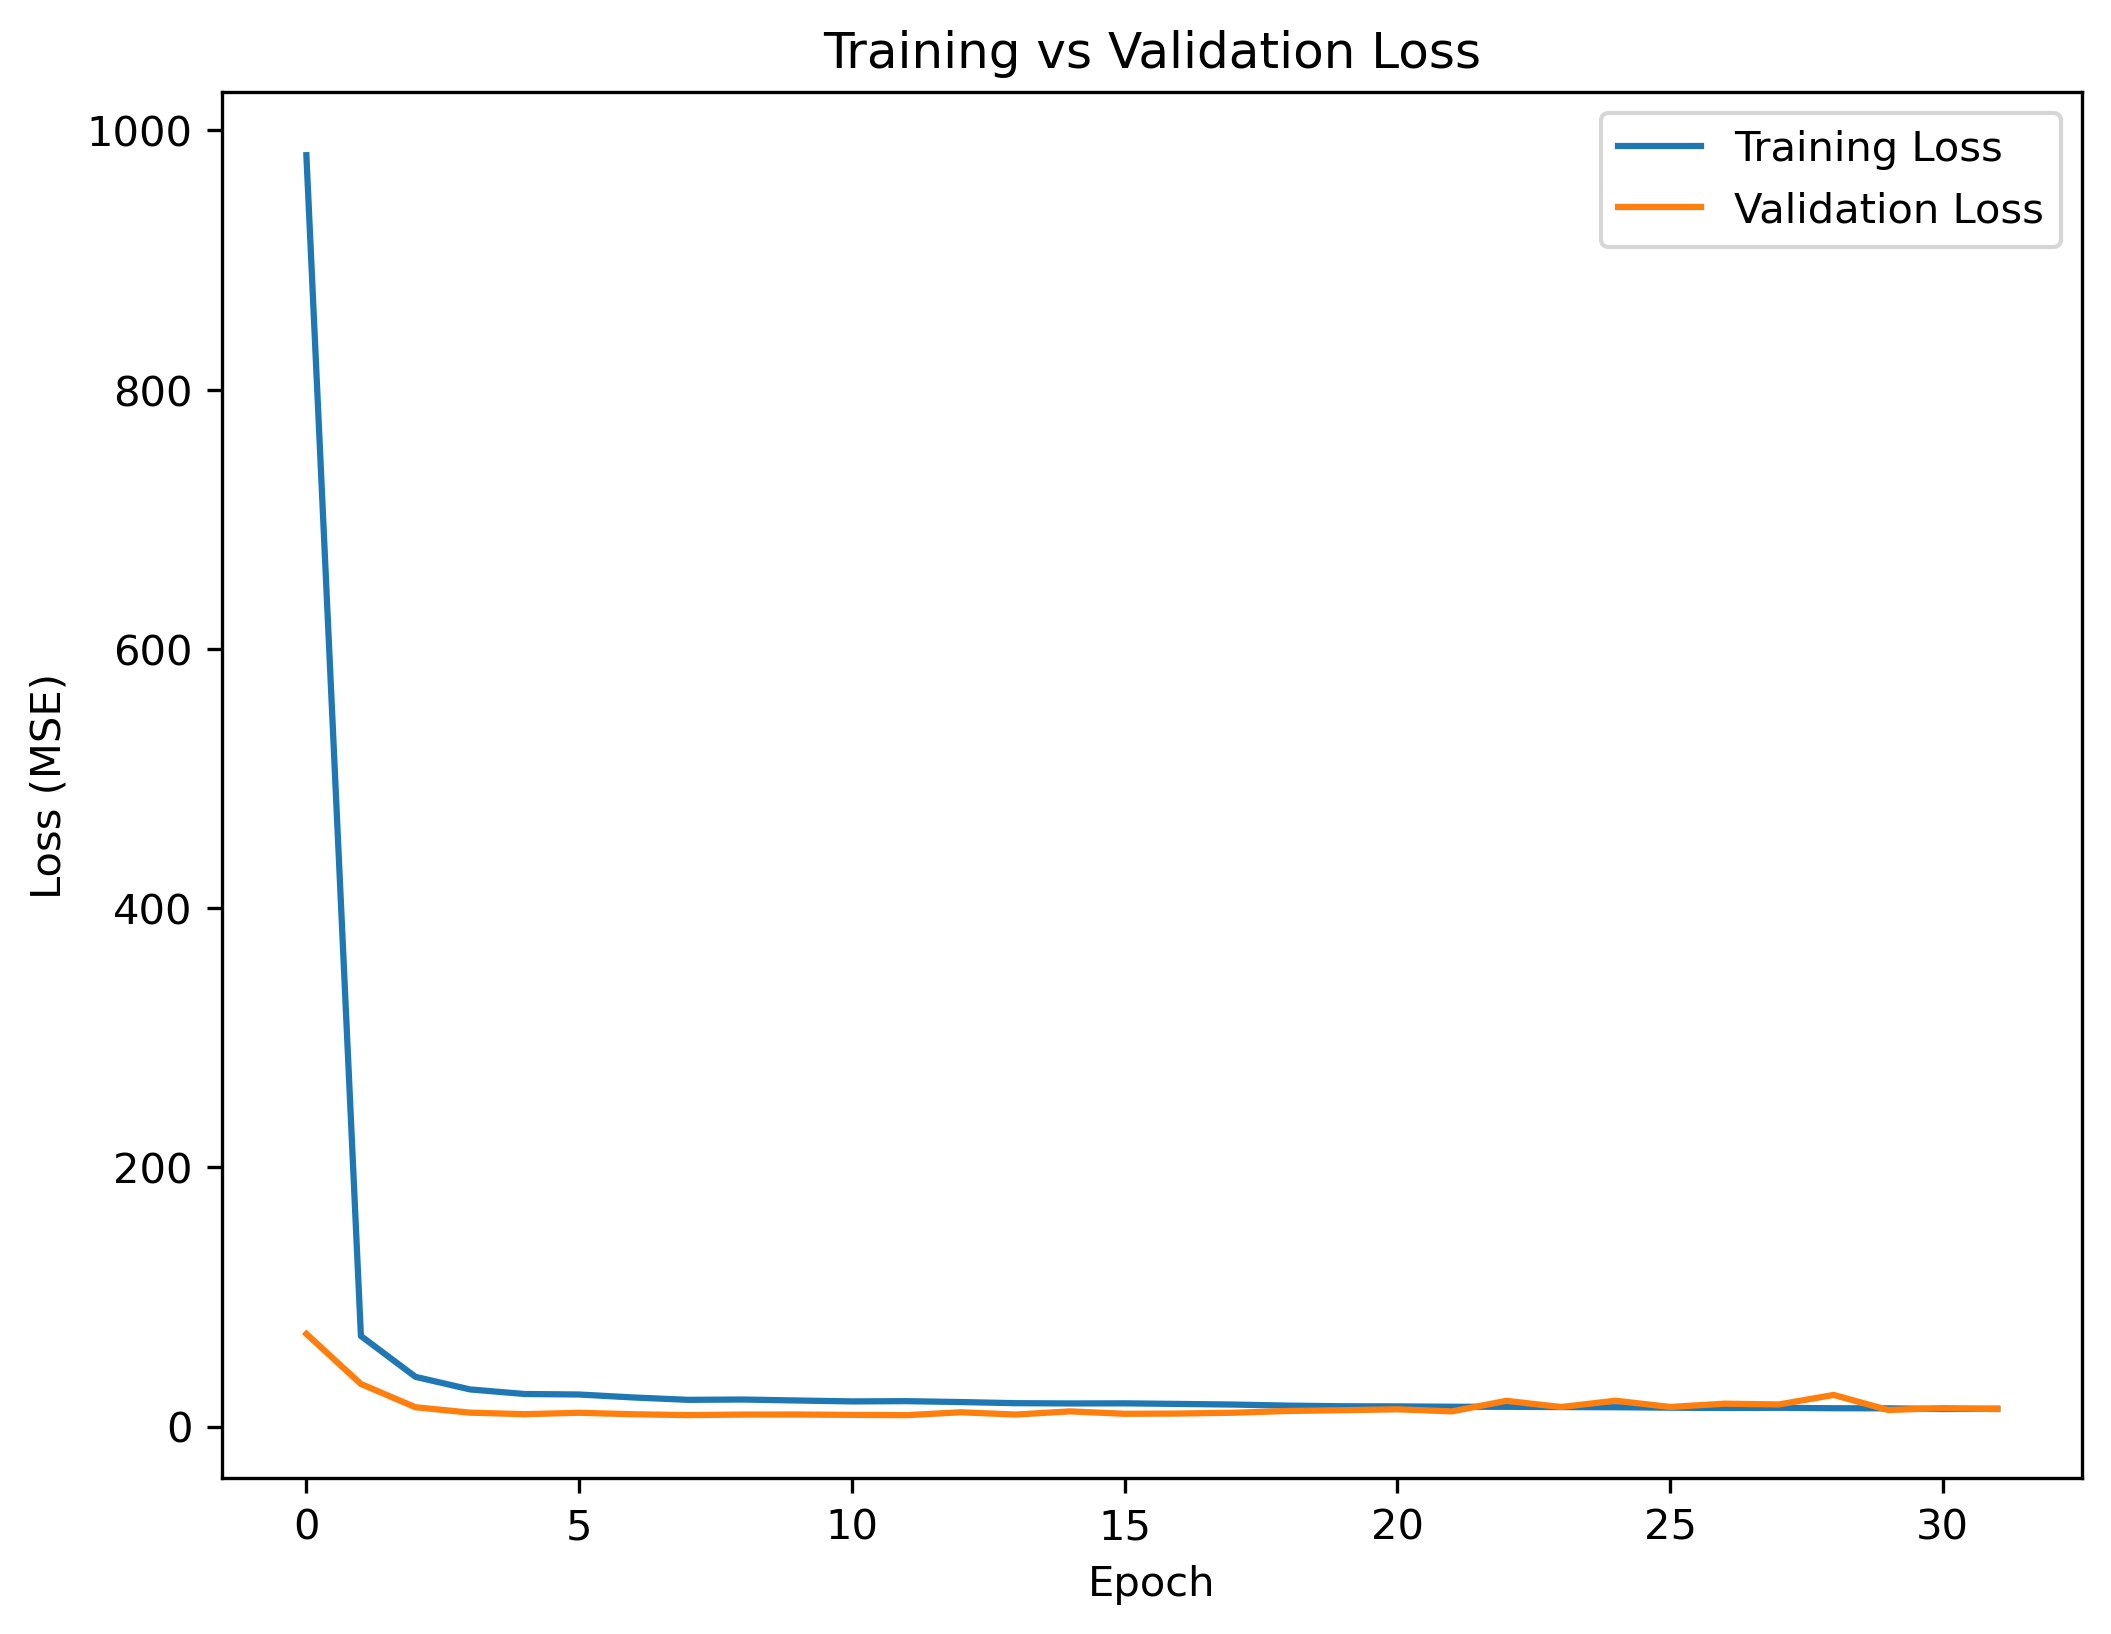


Evaluation Metrics
MAE: 1.6443 | MSE: 11.2285 | RMSE: 3.3509 | R²: 0.8758


<Sequential name=sequential_1, built=True>

In [87]:
train_ann_model(
    stream_df,
    target_col='Monthly_Spend',
    epochs=200,
    patience=20,
    dropout_rate=0.2,
    learning_rate=0.001,
    layer_sizes=[64, 64, 64]
)

### Changing learning rate

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 783.1091 - mean_absolute_error: 21.5746 - mean_squared_error: 783.1091 - val_loss: 15.2928 - val_mean_absolute_error: 2.6962 - val_mean_squared_error: 15.2928
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26.8307 - mean_absolute_error: 3.8123 - mean_squared_error: 26.8307 - val_loss: 9.7097 - val_mean_absolute_error: 1.8407 - val_mean_squared_error: 9.7097
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26.7406 - mean_absolute_error: 3.5502 - mean_squared_error: 26.7406 - val_loss: 8.7371 - val_mean_absolute_error: 1.5086 - val_mean_squared_error: 8.7371
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20.9794 - mean_absolute_error: 3.2226 - mean_squared_error: 20.9794 - val_loss: 8.7111 - val_mean_absolute_error: 1.5177 - val_mean_squared_error: 8.7111
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20.8230 - mean_absolute_error: 3.3380 - mean_squared_error: 20.8230 - val_

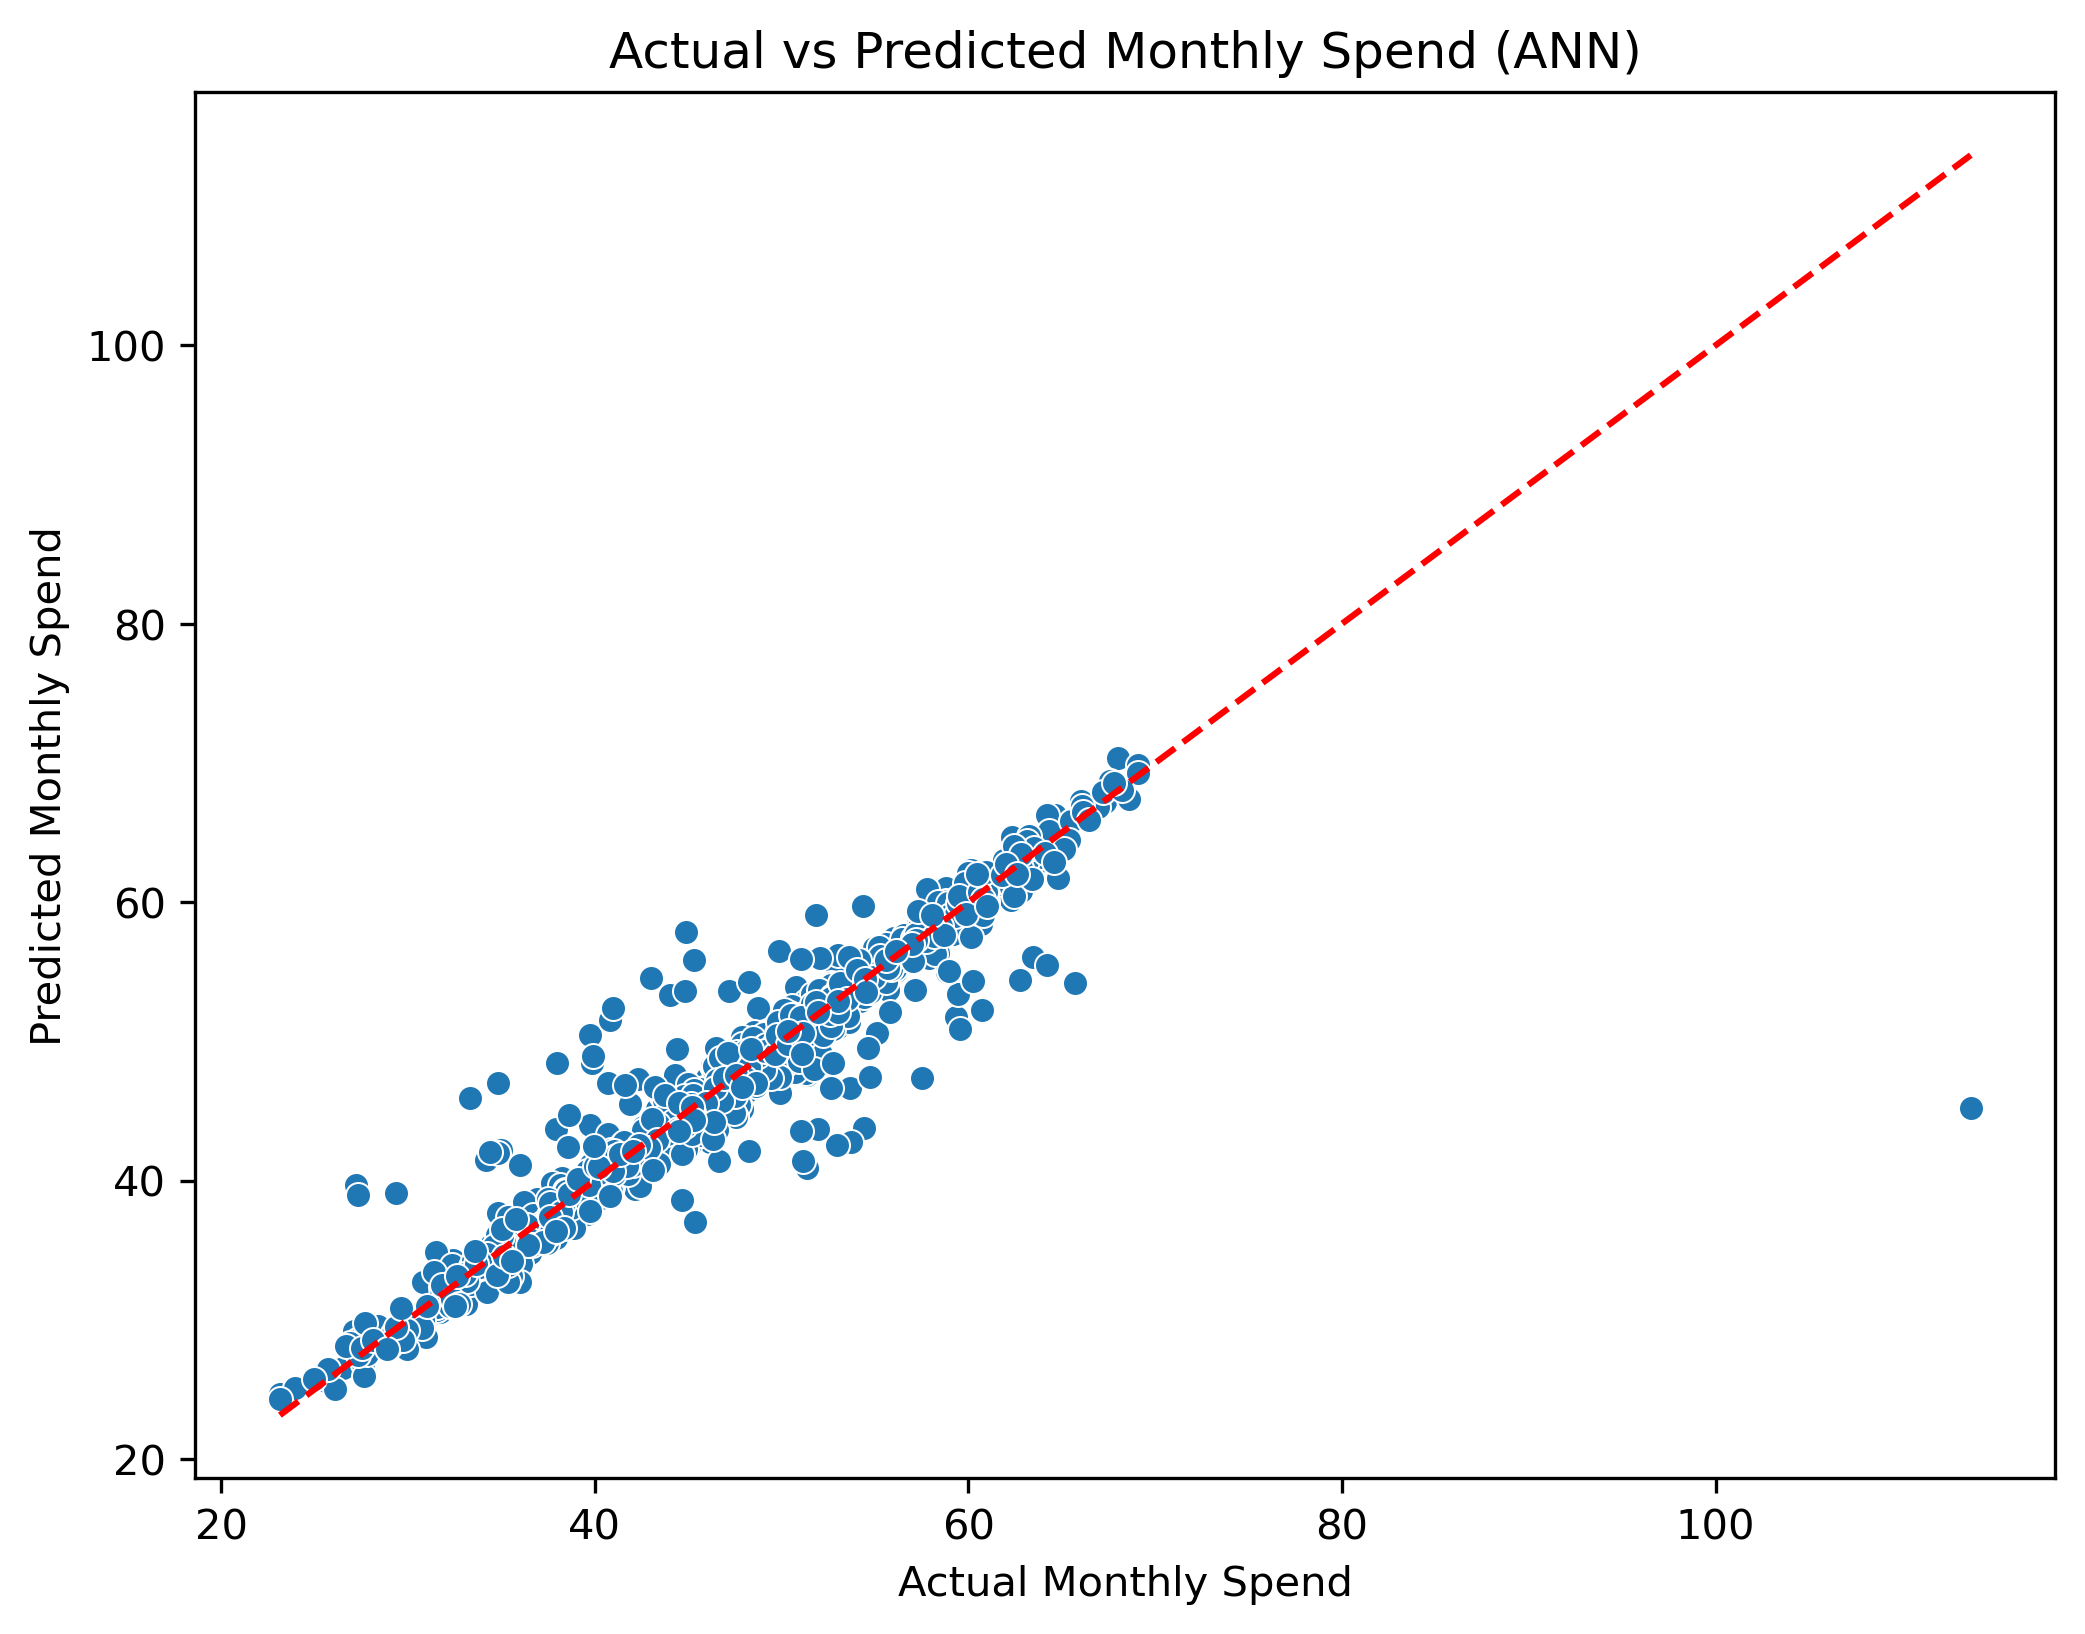

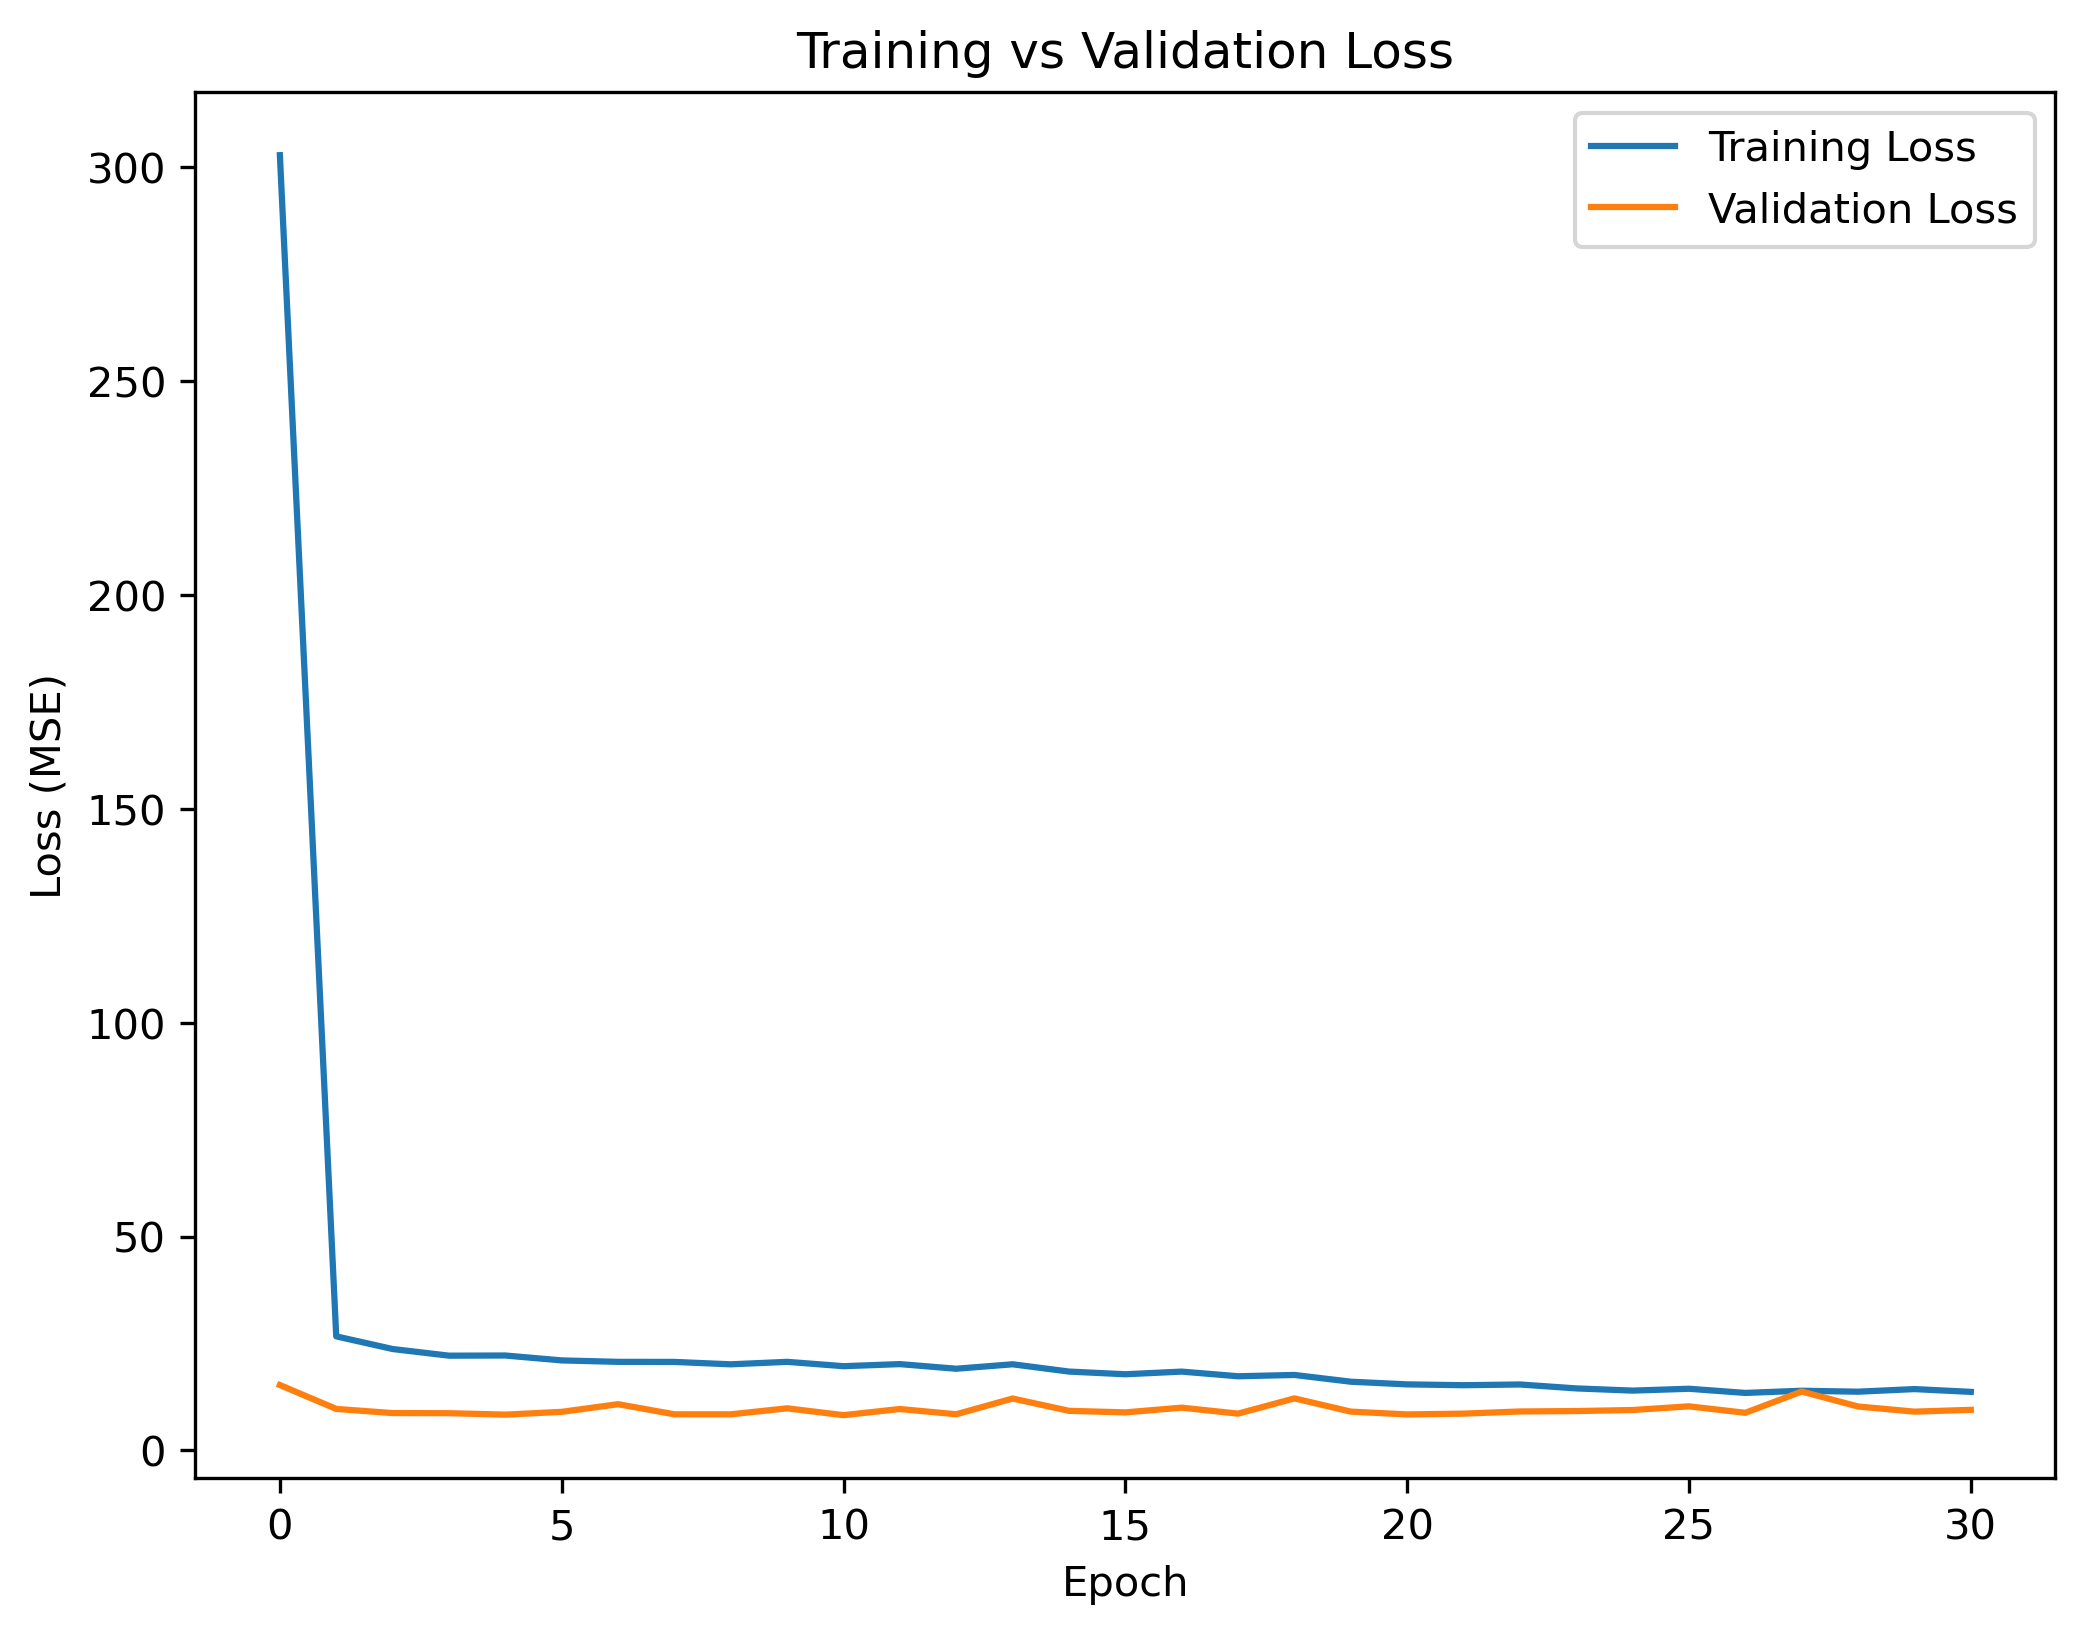


Evaluation Metrics
MAE: 1.4515 | MSE: 10.4117 | RMSE: 3.2267 | R²: 0.8848


<Sequential name=sequential_2, built=True>

In [89]:
train_ann_model(
    stream_df,
    target_col='Monthly_Spend',
    epochs=200,
    patience=20,
    dropout_rate=0.2,
    learning_rate=0.01,
    layer_sizes=[64, 64]
)

### Changing dropout

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1969.9299 - mean_absolute_error: 43.1094 - mean_squared_error: 1969.9299 - val_loss: 140.4353 - val_mean_absolute_error: 9.6619 - val_mean_squared_error: 140.4353
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 107.0050 - mean_absolute_error: 8.2449 - mean_squared_error: 107.0050 - val_loss: 68.4830 - val_mean_absolute_error: 6.6624 - val_mean_squared_error: 68.4830
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 67.5465 - mean_absolute_error: 6.4984 - mean_squared_error: 67.5465 - val_loss: 45.4148 - val_mean_absolute_error: 5.3530 - val_mean_squared_error: 45.4148
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48.8374 - mean_absolute_error: 5.2638 - mean_squared_error: 48.8374 - val_loss: 27.6584 - val_mean_absolute_error: 4.0151 - val_mean_squared_error: 27.6584
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32.3330 - mean_absolute_error: 4.1691 - mean_squared_error: 32

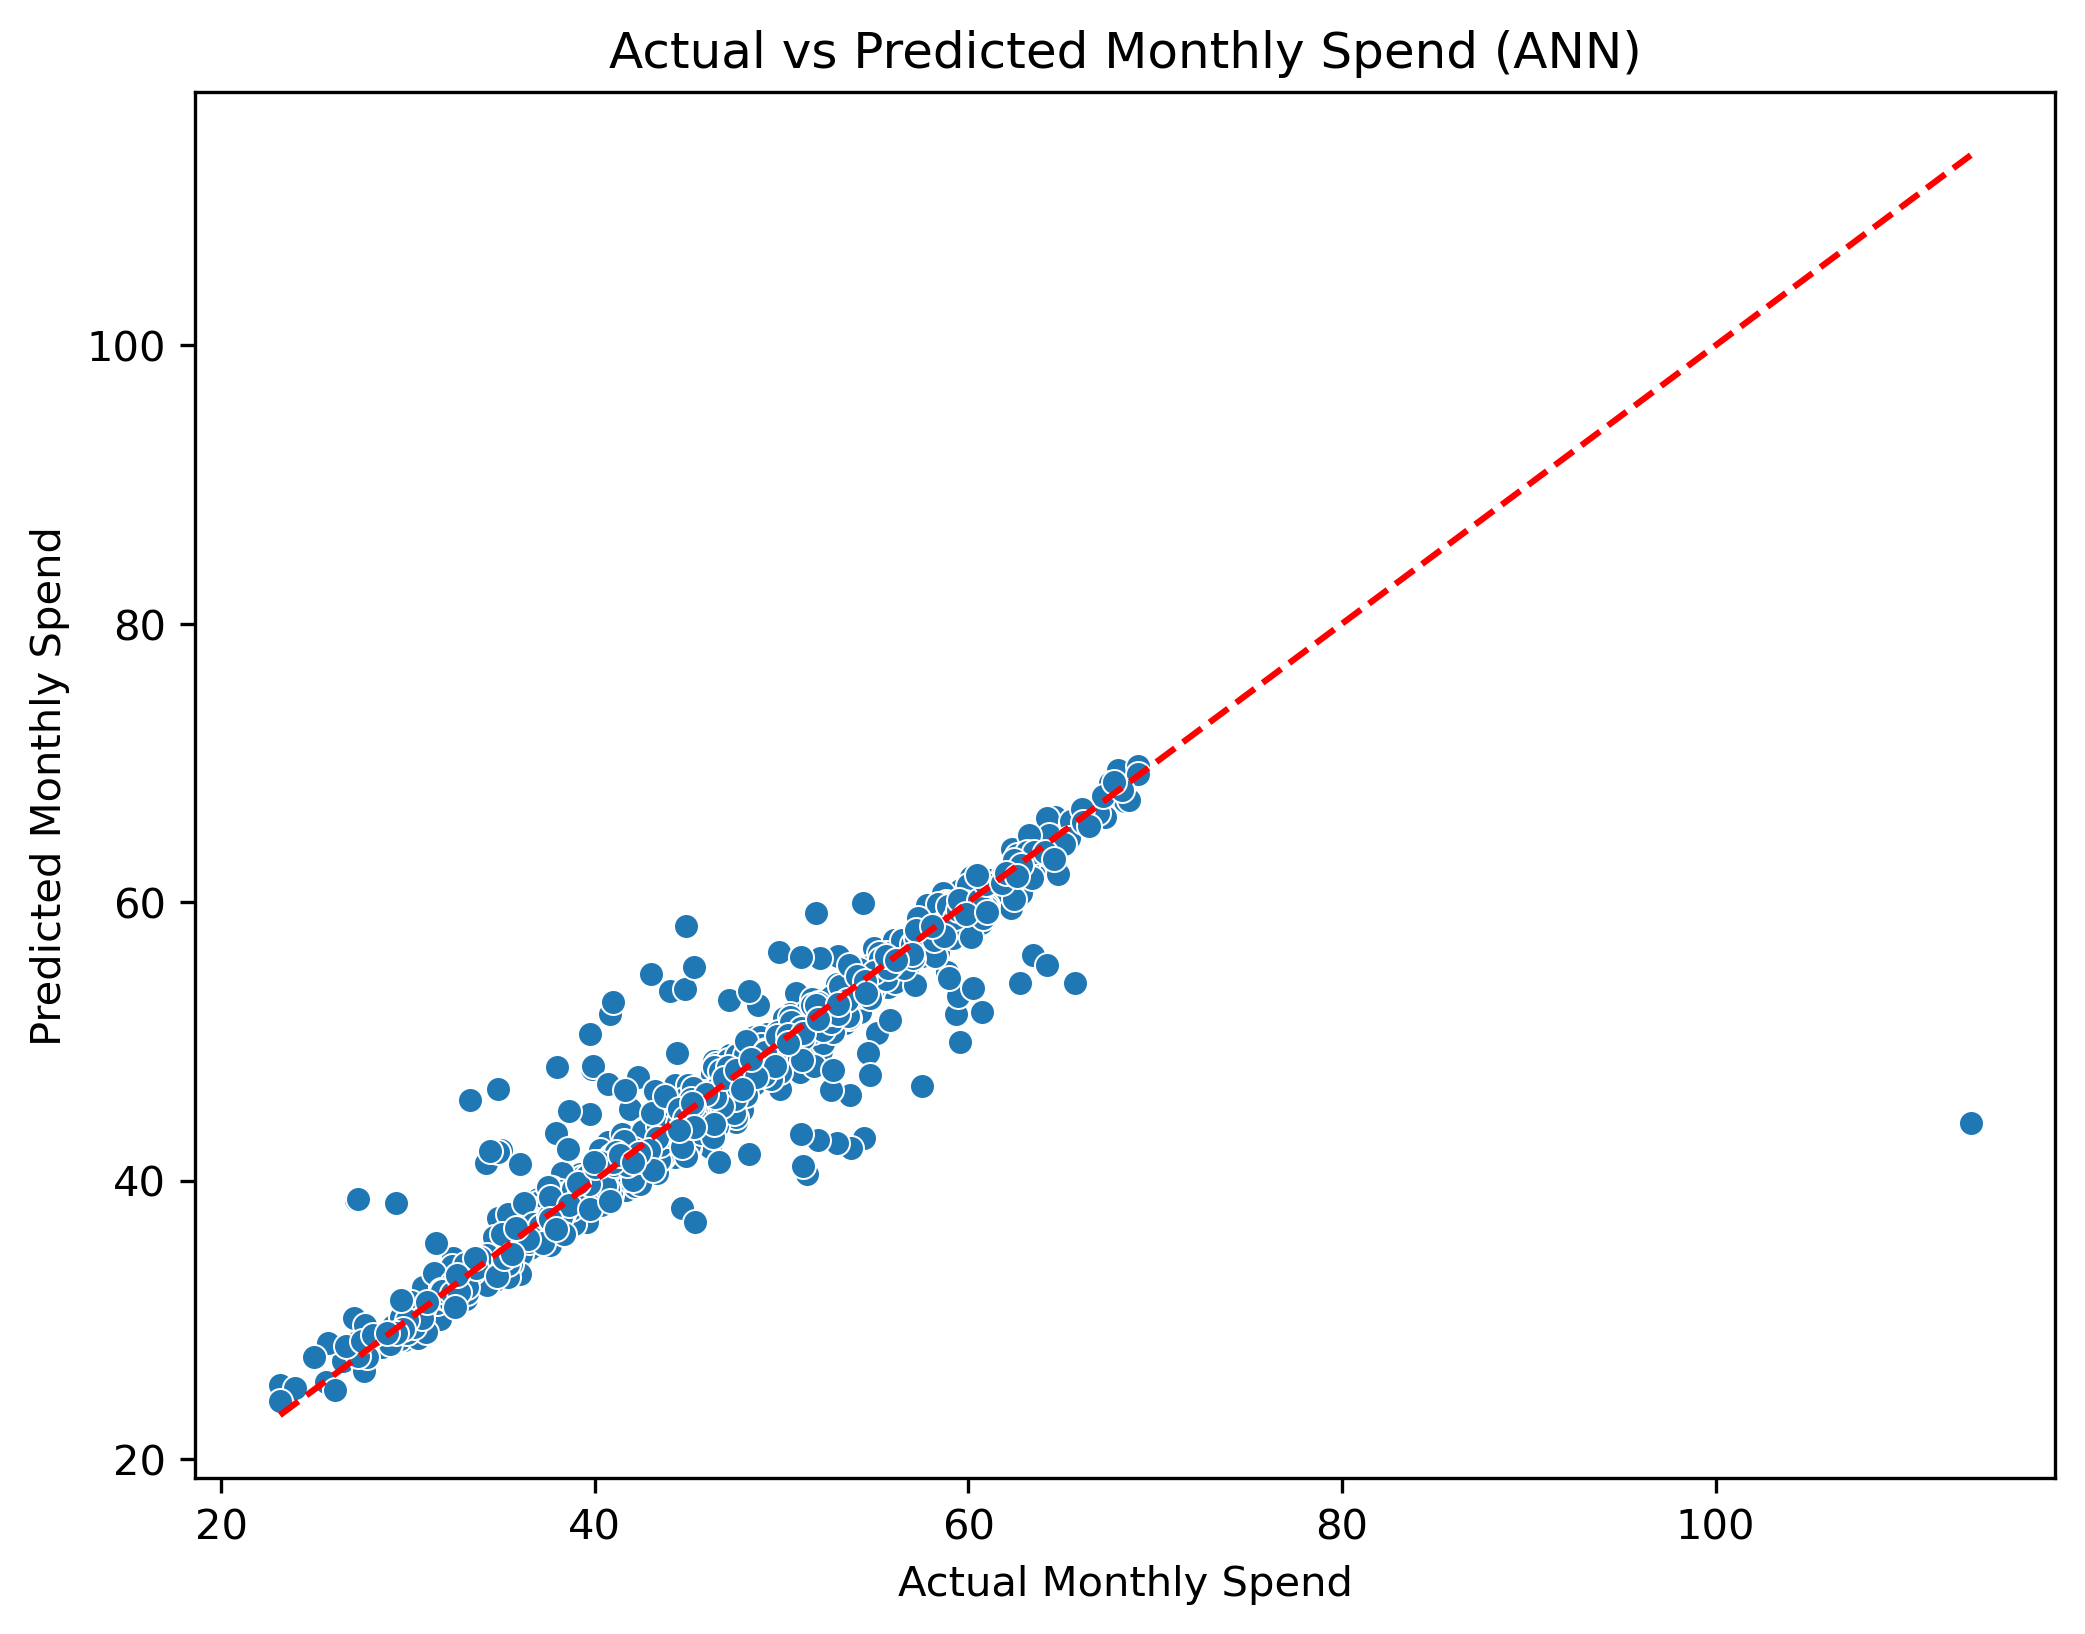

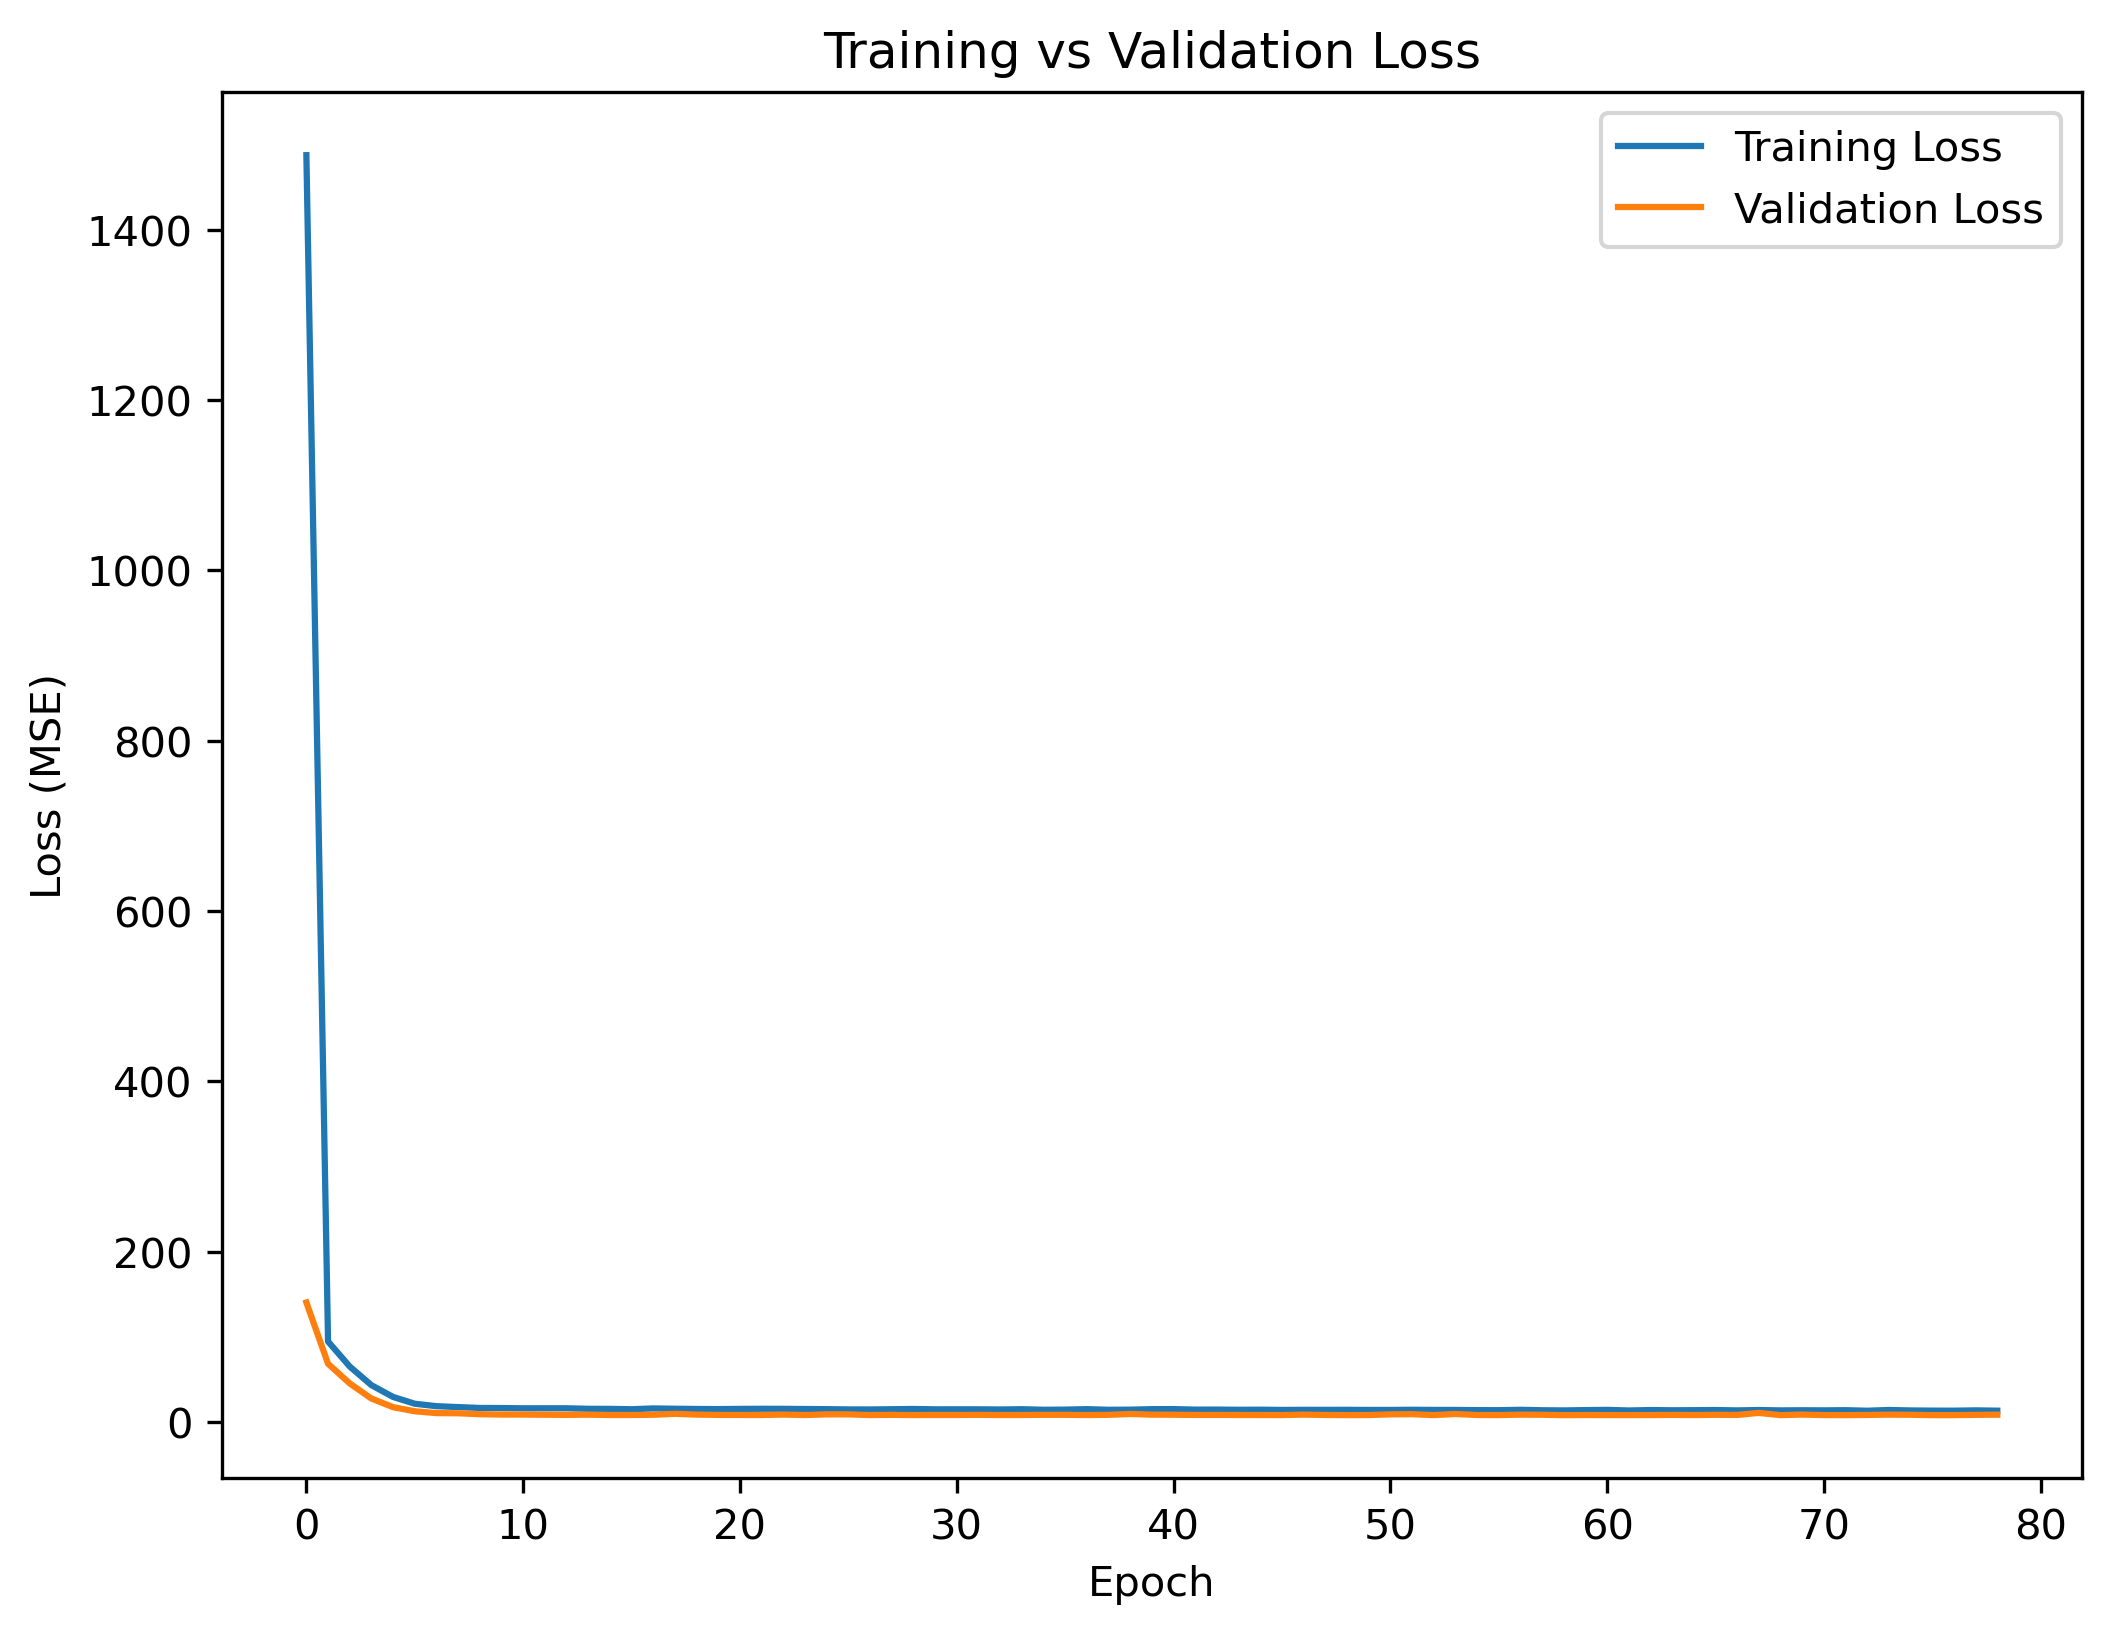


Evaluation Metrics
MAE: 1.4195 | MSE: 10.5462 | RMSE: 3.2475 | R²: 0.8833


<Sequential name=sequential_3, built=True>

In [91]:
train_ann_model(
    stream_df,
    target_col='Monthly_Spend',
    epochs=200,
    patience=20,
    dropout_rate=0.1,
    learning_rate=0.001,
    layer_sizes=[64, 64]
)

The plot above illustrates the relationship between training and validation loss over a series of epochs during the training process of my ANN.

At the beginning of training, both the training and validation loss decrease sharply, at around the 2nd epoch, indicating that the model is quickly learning patterns from the data. As training progresses, both loss curves begin to flatten, stabilizing at relatively low values. This suggests that the model has successfully converged and is no longer making significant improvements with each epoch. Importantly, the validation loss closely follows the training loss throughout the training process, which is a strong indication that the model is generalizing well to unseen data and is not overfitting.

Overall, this graph reflects a well-performing model that learns effectively without compromising its ability to generalize. Based on the trajectory of the loss curves, it may even be possible to stop training earlier, around the 10th epoch, as further training offers diminishing returns.

# Classification Models

(f) Next, I will train, evaluate and compare classification models to predict whether a customer will churn 
(1) or not churn (0) based on available features. I will also determine which model performs best, and why making use of the appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, AUC-ROC) to 
justify my findings

## KNN

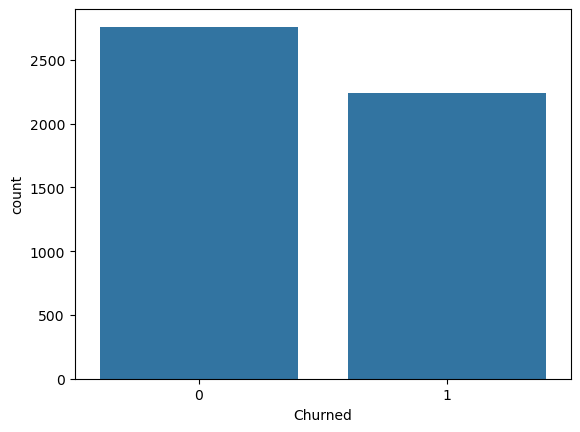

In [96]:
sns.countplot(data = stream_df, x = "Churned")  #Show Churned distribution
plt.show()

<Axes: xlabel='Churned', ylabel='count'>

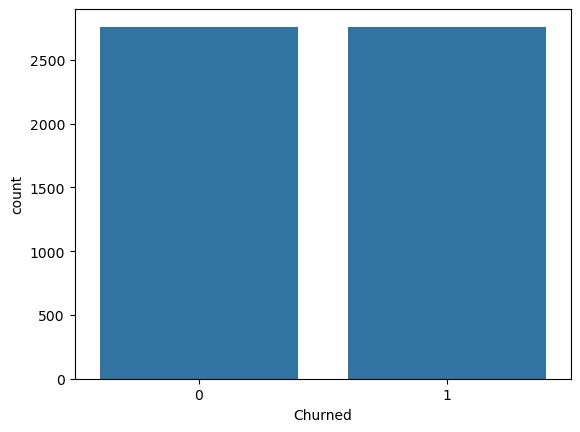

In [97]:
feature_columns = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
x = stream_df[feature_columns]
#Extracting the output features.
y = stream_df["Churned"]

sm = SMOTE(random_state=42, k_neighbors = 2)
x_res, y_res = sm.fit_resample(x, y)
new_df = pd.DataFrame({"Churned" : y_res.to_numpy()})
#Now using Seaborn to plot the distribution of class labels.
sns.countplot(data = new_df, x = "Churned")

In [98]:
def run_knn(stream_df, numerical_features, categorical_features, target_col="Churned", n_neighbors=5):
    
    X = stream_df[numerical_features + categorical_features]        #Combine numerical and categorical features
    y = stream_df[target_col]                                       #Extract the target variable

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)               

    
    #Use ColumnTransformer to scale numerical features and one-hot encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),   #Standardize numerical features
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  #One-hot encode categorical features
        ]
    )

    #Create pipeline
    #Combine preprocessing and KNN classifier into a pipeline for streamlined data processing
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),                         #Apply preprocessing
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))  #KNN model with specified neighbors
    ])

    pipeline.fit(X_train, y_train)                              #Train the model using the training data

    y_pred = pipeline.predict(X_test)                           #Predict class labels for the test set
    y_proba = pipeline.predict_proba(X_test)[:, 1]              #Predict probabilities for the positive class

    acc = accuracy_score(y_test, y_pred)                        #Calculate accuracy
    prec = precision_score(y_test, y_pred)                      #Calculate precision
    rec = recall_score(y_test, y_pred)                          #Calculate recall
    f1 = f1_score(y_test, y_pred)                               #Calculate F1 score
    auc = roc_auc_score(y_test, y_proba)                        #Calculate area under the ROC curve (AUC)

    print("Classification Report for KNN (with mixed data):")   #Heading for metrics output
    print(classification_report(y_test, y_pred))                #Print detailed classification metrics
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f} | AUC-ROC: {auc:.4f}")  # Summary of metrics

    cm = confusion_matrix(y_test, y_pred)                       #Compute the confusion matrix
    plt.figure(figsize=(6, 4))                                  #Set plot size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["Not Churned", "Churned"],         #Add labels for the confusion matrix
                yticklabels=["Not Churned", "Churned"])         #Add labels for the confusion matrix
    plt.xlabel("Predicted")                                     #Label x-axis
    plt.ylabel("Actual")                                        #Label y-axis
    plt.title("Confusion Matrix - KNN")                         #Add title to the plot
    plt.show()                                                  #Display the confusion matrix plot

    plt.figure(figsize=(8, 6))                                  #Set plot size
    ax = plt.gca()                                              #Get current axes for overlaying
    RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax)    #Plot ROC curve on current axes
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")       #Add diagonal line for random guess
    plt.xlabel('False Positive Rate')                           #Label x-axis
    plt.ylabel('True Positive Rate')                            #Label y-axis
    plt.title("ROC Curve - KNN")                                #Add title to the plot
    plt.legend()                                                #Add legend
    plt.show()                                                  #Display the ROC curve plot

    return {
        "Model": "KNN",                                         #Name of the model
        "n_neighbors": n_neighbors,                             #Number of neighbors used in KNN
        "Accuracy": acc,                                        #Accuracy of the model
        "Precision": prec,                                      #Precision of the model
        "Recall": rec,                                          #Recall of the model
        "F1-Score": f1,                                         #F1 Score of the model
        "AUC-ROC": auc                                          #Area Under the ROC Curve
    }



Classification Report for KNN (with mixed data):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       545
           1       0.86      0.82      0.84       455

    accuracy                           0.86      1000
   macro avg       0.86      0.85      0.86      1000
weighted avg       0.86      0.86      0.86      1000

Accuracy: 0.8570 | Precision: 0.8611 | Recall: 0.8176 | F1-Score: 0.8388 | AUC-ROC: 0.9187


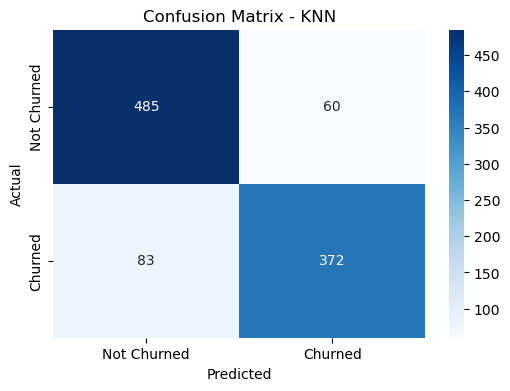

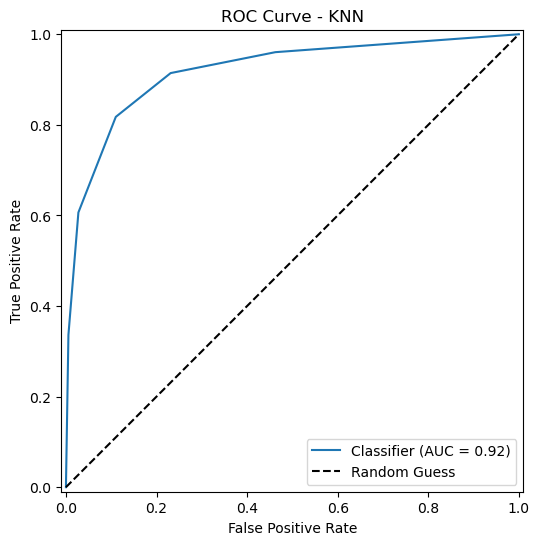

{'Model': 'KNN',
 'n_neighbors': 5,
 'Accuracy': 0.857,
 'Precision': 0.8611111111111112,
 'Recall': 0.8175824175824176,
 'F1-Score': 0.8387824126268321,
 'AUC-ROC': 0.9186591390261115}

In [99]:
numerical = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
categorical = ["Gender", "Region", "Payment_Method"]

run_knn(stream_df, numerical, categorical, target_col="Churned", n_neighbors=5)

## Random Forest

In [101]:
def run_random_forest_with_smote_and_plots(stream_df, numerical_features, categorical_features, target_col="Churned", n_estimators=100, max_depth=None):
    
    print("Class Distribution Before SMOTE")                         #Display class distribution prior to oversampling
    sns.countplot(data=stream_df, x=target_col)                      #Create a count plot for target classes
    plt.title("Before SMOTE")                                        #Add a title to the plot
    plt.show()                                                       #Show the plot

    X = stream_df[numerical_features + categorical_features]         #Combine numerical and categorical features
    y = stream_df[target_col]                                        #Extract the target variable

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)    

    #Use ColumnTransformer to scale numerical features and one-hot encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_features),            #Standardize numerical features
            ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)  #One-hot Encode categorical features
        ]
    )

    smote = SMOTE(random_state=42, k_neighbors=5)                     #Create an instance of SMOTE for oversampling
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),                               #Apply preprocessing steps
        ("rf", RandomForestClassifier(
            n_estimators=n_estimators,                                #Number of trees in the Random Forest
            max_depth=max_depth,                                      #Maximum depth of each tree
            random_state=42))                                         #Set random state for reproducibility
    ])

    pipeline.fit(X_train, y_train)                                    #Train the model using the training data

    X_train_transformed = preprocessor.fit_transform(X_train)         #Apply preprocessing to training data
    X_res, y_res = smote.fit_resample(X_train_transformed, y_train)   #Apply SMOTE to create balanced training data

    print("Class Distribution After SMOTE")                           #Display class distribution after oversampling
    resampled_df = pd.DataFrame({target_col: y_res})                  #Create a DataFrame for the resampled target data
    sns.countplot(data=resampled_df, x=target_col)                    #Plot the resampled class distribution
    plt.title("After SMOTE (Training Data)")                          #Add a title to the plot
    plt.show()                                                        #Show the plot

    y_pred = pipeline.predict(X_test)                                 #Predict class labels for the test set
    y_proba = pipeline.predict_proba(X_test)[:, 1]                    #Predict probabilities for the positive class

    acc = accuracy_score(y_test, y_pred)                              #Calculate accuracy
    prec = precision_score(y_test, y_pred)                            #Calculate precision
    rec = recall_score(y_test, y_pred)                                #Calculate recall
    f1 = f1_score(y_test, y_pred)                                     #Calculate F1 score
    auc = roc_auc_score(y_test, y_proba)                              #Calculate Area Under the ROC Curve (AUC)

    #Print classification metrics
    print("Classification Report - Random Forest with SMOTE:")        #Heading for classification metrics
    print(classification_report(y_test, y_pred))                      #Print detailed classification metrics
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1-Score: {f1:.3f} | AUC-ROC: {auc:.3f}")  #Summary

    #Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)                              #Compute confusion matrix
    plt.figure(figsize=(10, 6))                                        #Set plot size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=["Not Churned", "Churned"],                #Add labels for the confusion matrix
                yticklabels=["Not Churned", "Churned"])                #Add labels for the confusion matrix
    plt.xlabel("Predicted")                                            #Label x-axis
    plt.ylabel("Actual")                                               #Label y-axis
    plt.title("Confusion Matrix - Random Forest with SMOTE")           #Add title
    plt.show()                                                         #Display the plot

    plt.figure(figsize=(10, 6))                                        #Set plot size
    ax = plt.gca()                                                     #Get current axes
    RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax)           #Plot ROC curve on current axes
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")              #Add diagonal line for random guess
    plt.xlabel('False Positive Rate')                                  #Label x-axis
    plt.ylabel('True Positive Rate')                                   #Label y-axis
    plt.title("ROC Curve - Random Forest with SMOTE")                  #Add title
    plt.legend()                                                       #Add legend
    plt.show()                                                         #Display the plot

    #Feature importance visualization
    ohe = pipeline.named_steps["preprocessor"].named_transformers_["cat"]  #Access OneHotEncoder
    ohe_feature_names = ohe.get_feature_names_out(categorical_features)    #Get names for one-hot encoded features
    all_feature_names = np.concatenate([numerical_features, ohe_feature_names])  #Combine numerical and categorical feature names

    importances = pipeline.named_steps["rf"].feature_importances_       #Extract feature importance from Random Forest
    importance_df = pd.DataFrame({
        "Feature": all_feature_names,                                   #Create a DataFrame for feature names and importances
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)                    #Sort features by importance in descending order

    plt.figure(figsize=(10, 6))                                         #Set plot size
    sns.barplot(data=importance_df.head(5), x="Importance", y="Feature", palette="viridis")  # Plot top 5 features
    plt.title("Top 5 Feature Importances - Random Forest with SMOTE")   #Add title
    plt.tight_layout()                                                  #Adjust layout
    plt.show()                                                          #Display the plot

    return {
        "Model": "Random Forest with SMOTE",                            #Name of the model
        "n_estimators": n_estimators,                                   #Number of estimators used in Random Forest
        "max_depth": max_depth,                                         #Maximum depth of the trees
        "Accuracy": acc,                                                #Accuracy of the model
        "Precision": prec,                                              #Precision of the model
        "Recall": rec,                                                  #Recall of the model
        "F1-Score": f1,                                                 #F1 Score of the model
        "AUC-ROC": auc,                                                 #Area Under the ROC Curve
        "Feature Importance": importance_df                             #Feature importance rankings
    }



Class Distribution Before SMOTE


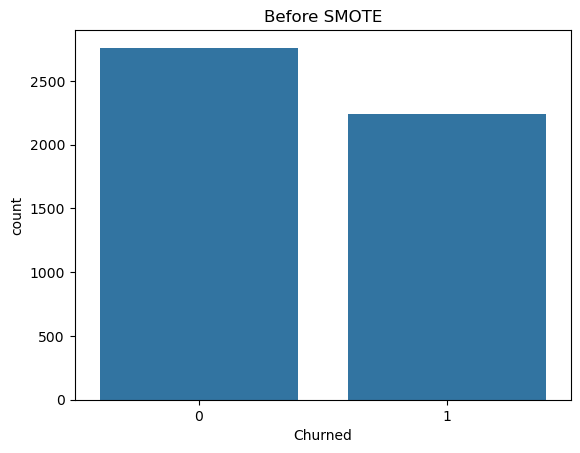

Class Distribution After SMOTE


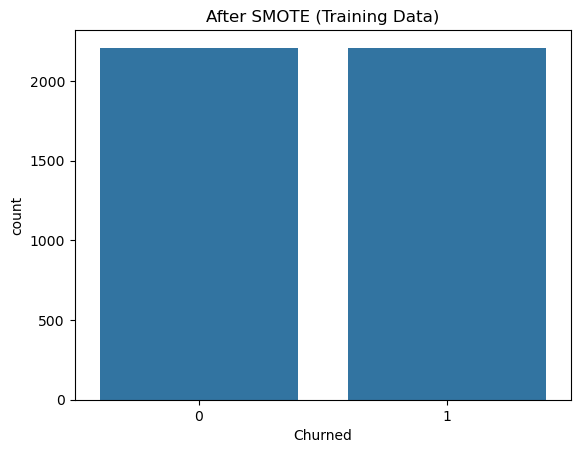

Classification Report - Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       552
           1       1.00      0.96      0.98       448

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy: 0.980 | Precision: 1.000 | Recall: 0.955 | F1-Score: 0.977 | AUC-ROC: 0.988


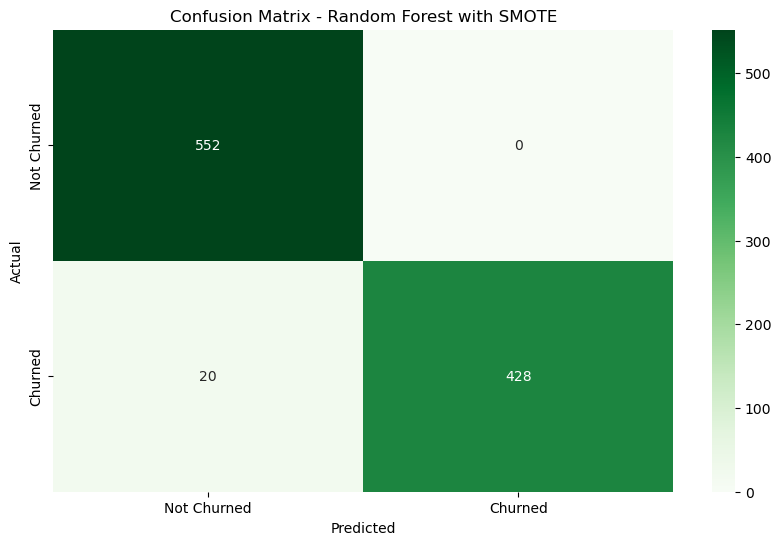

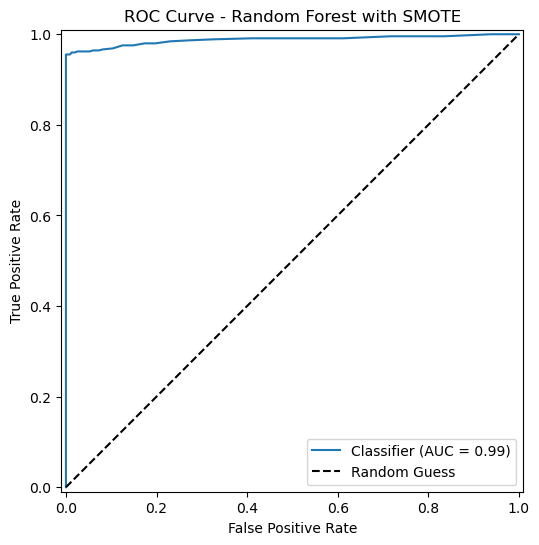

C:\Users\USER\AppData\Local\Temp\ipykernel_1388\3490898644.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(5), x="Importance", y="Feature", palette="viridis")  # Plot top 5 features


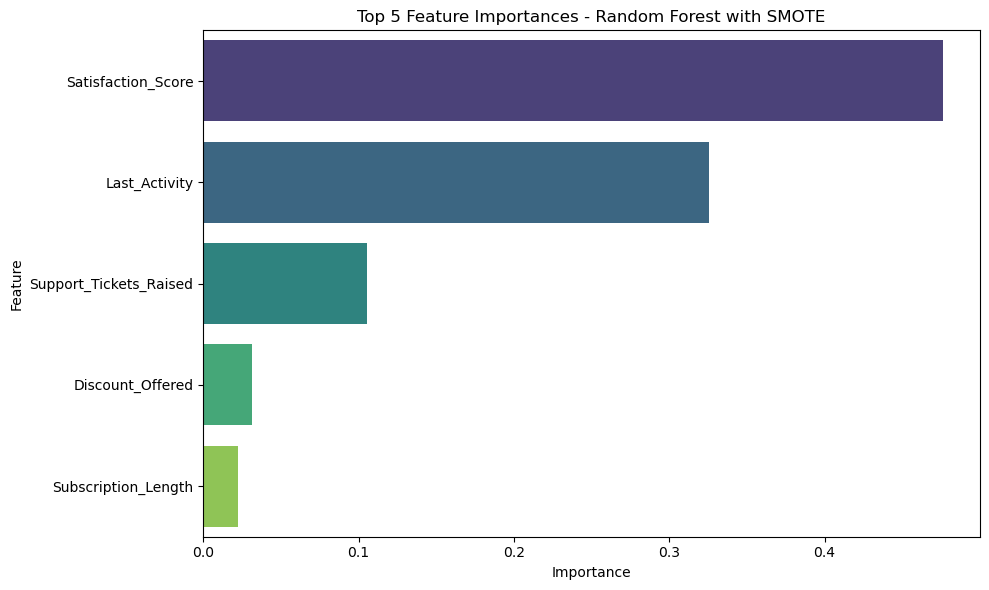

{'Model': 'Random Forest with SMOTE',
 'n_estimators': 100,
 'max_depth': None,
 'Accuracy': 0.98,
 'Precision': 1.0,
 'Recall': 0.9553571428571429,
 'F1-Score': 0.9771689497716894,
 'AUC-ROC': 0.9879779697204969,
 'Feature Importance':                       Feature  Importance
 3          Satisfaction_Score    0.476168
 5               Last_Activity    0.325273
 2      Support_Tickets_Raised    0.105131
 4            Discount_Offered    0.031154
 1         Subscription_Length    0.022243
 0                         Age    0.021526
 6                 Gender_Male    0.003976
 11      Payment_Method_PayPal    0.003456
 7                Region_North    0.003059
 10  Payment_Method_Debit Card    0.002861
 8                Region_South    0.002812
 9                 Region_West    0.002341}

In [102]:
numerical = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
categorical = ["Gender", "Region", "Payment_Method"]  

run_random_forest_with_smote_and_plots(stream_df, numerical, categorical, target_col="Churned", n_estimators=100)

## SVM

In [104]:
def run_svm_with_smote(stream_df, numerical_features, categorical_features, target_col="Churned", kernel="rbf", C=1.0):
    
    print("Class Distribution Before SMOTE")                          #Print the initial class distribution
    sns.countplot(data=stream_df, x=target_col)                       #Plot the count of each class in the target variable
    plt.title("Before SMOTE")                                         #Add title to the plot
    plt.show()                                                        #Display the plot

    
    X = stream_df[numerical_features + categorical_features]          #Combine numerical and categorical features
    y = stream_df[target_col]                                         #Extract the target variable

    #Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)     

    #Use ColumnTransformer to scale numerical features and one-hot encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_features),              #Standardize numerical features
            ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)  #One-hot encode categorical features
        ]
    )

    smote = SMOTE(random_state=42, k_neighbors=2)                        #Create an instance of SMOTE for oversampling
    model = SVC(probability=True, kernel=kernel, C=C, random_state=42)   #Create SVM classifier with specified kernel and hyperparameter C

    #Combine preprocessing, SMOTE, and SVM into a pipeline
    pipeline = ImbPipeline(steps=[
        ("preprocessor", preprocessor),                                  #Apply preprocessing
        ("smote", smote),                                                #Apply SMOTE
        ("svm", model)                                                   #Train SVM
    ])


    pipeline.fit(X_train, y_train)                                       #Train the model using the training data

    
    X_train_transformed = preprocessor.fit_transform(X_train)            #Apply preprocessing to training data
    X_res, y_res = smote.fit_resample(X_train_transformed, y_train)      #Apply SMOTE to create balanced training data

    
    print("Class Distribution After SMOTE")                              #Print the class distribution after oversampling
    new_df = pd.DataFrame({target_col: y_res})                           #Create a DataFrame for the resampled target variable
    sns.countplot(data=new_df, x=target_col)                             #Plot the resampled class distribution
    plt.title("After SMOTE (Training Data)")                             #Add title to the plot
    plt.show()                                                           #Display the plot

    
    y_pred = pipeline.predict(X_test)                                    #Predict class labels for the test set
    y_proba = pipeline.predict_proba(X_test)[:, 1]                       #Predict probabilities for the positive class

    
    acc = accuracy_score(y_test, y_pred)                                 #Calculate accuracy
    prec = precision_score(y_test, y_pred)                               #Calculate precision
    rec = recall_score(y_test, y_pred)                                   #Calculate recall
    f1 = f1_score(y_test, y_pred)                                        #Calculate F1 score
    auc = roc_auc_score(y_test, y_proba)                                 #Calculate Area Under the ROC Curve (AUC)

    #Print classification metrics
    print("Classification Report - SVM with SMOTE:")                     #Print heading for classification report
    print(classification_report(y_test, y_pred))                         #Display detailed classification metrics
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1-Score: {f1:.3f} | AUC-ROC: {auc:.3f}")  #Summary

    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)                                 #Compute confusion matrix
    plt.figure(figsize=(6, 4))                                            #Set plot size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Churned", "Churned"],                   #Add labels for the confusion matrix
                yticklabels=["Not Churned", "Churned"])                   #Add labels for the confusion matrix
    plt.xlabel("Predicted")                                               #Label x-axis
    plt.ylabel("Actual")                                                  #Label y-axis
    plt.title("Confusion Matrix - SVM with SMOTE")                        #Add title
    plt.show()                                                            #Display the plot

    #ROC Curve
    plt.figure(figsize=(8, 6))                                            #Set plot size
    ax = plt.gca()                                                        #Get current axes
    RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax)              #Plot ROC curve on current axes
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")                 #Add diagonal line for random guess
    plt.xlabel('False Positive Rate')                                     #Label x-axis
    plt.ylabel('True Positive Rate')                                      #Label y-axis
    plt.title("ROC Curve - SVM")                                          #Add title
    plt.legend()                                                          #Add legend
    plt.show()                                                            #Display the plot

    return {
        "Model": "SVM with SMOTE",                                        #Model name
        "Accuracy": acc,                                                  #Accuracy of the model
        "Precision": prec,                                                #Precision of the model
        "Recall": rec,                                                    #Recall of the model
        "F1-Score": f1,                                                   #F1 Score of the model
        "AUC-ROC": auc                                                    #Area Under the ROC Curve
    }



Class Distribution Before SMOTE


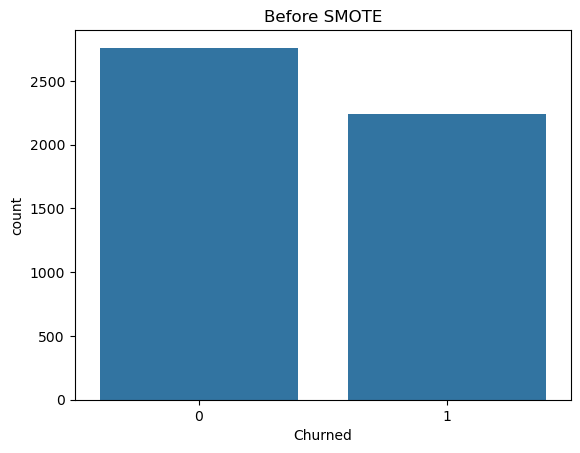

Class Distribution After SMOTE


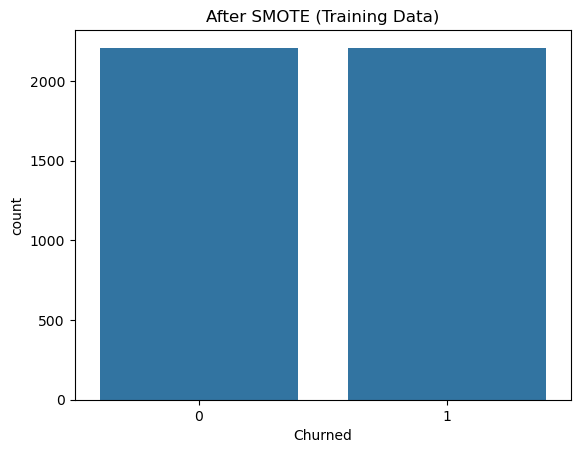

Classification Report - SVM with SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       552
           1       0.93      0.95      0.94       448

    accuracy                           0.95      1000
   macro avg       0.94      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy: 0.946 | Precision: 0.930 | Recall: 0.951 | F1-Score: 0.940 | AUC-ROC: 0.978


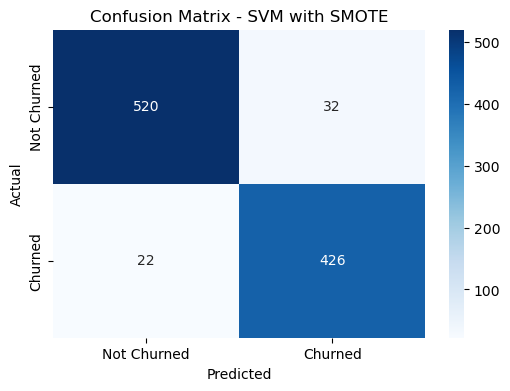

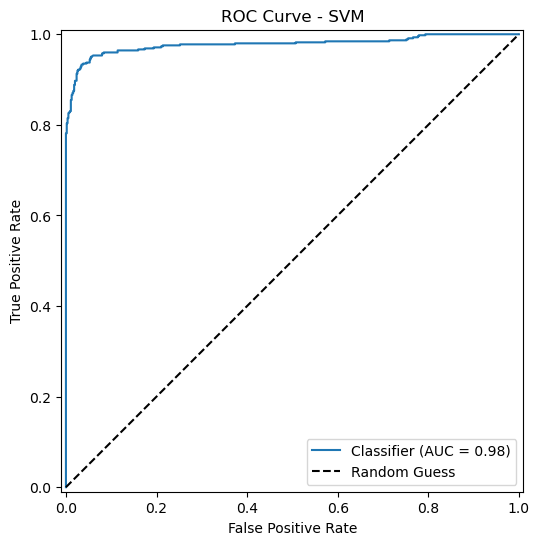

{'Model': 'SVM with SMOTE',
 'Accuracy': 0.946,
 'Precision': 0.9301310043668122,
 'Recall': 0.9508928571428571,
 'F1-Score': 0.9403973509933775,
 'AUC-ROC': 0.9779596111542443}

In [105]:
numerical = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
categorical = ["Gender", "Region", "Payment_Method"]

run_svm_with_smote(stream_df, numerical, categorical, target_col="Churned", kernel="rbf", C=1.0)


# K means Clustering

(g) I will Apply the k-Means clustering algorithm to identify different clusters in the streaming 
service dataset and find out What is the optimal number of clusters (k) and why, which features produce 
the most meaningful clusters supporting my answer with visualizations and evaluation metrics.


In [108]:
def run_kmeans_clustering(stream_df, feature_names, n_clusters=3, k_range=range(1, 11)):
    
    x = stream_df[feature_names]                                          #Extract the specified features for clustering
    scale = StandardScaler()                                              #Initialize StandardScaler
    x_scaled = scale.fit_transform(x)                                     #Scale the features to have mean=0 and std=1

    #Determine the optimal number of clusters using the elbow method
    inertia = []                                                          #List to store inertia values
    silhouette_scores = []                                                #List to store silhouette scores
    dbi_scores = []                                                       #List to store Davies-Bouldin scores
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)                    #Initialize KMeans with k clusters
        kmeans.fit(x_scaled)                                              #Fit the model
        inertia.append(kmeans.inertia_)                                   #Append inertia (sum of squared distances to centroids)

        #For k > 1, calculate clustering metrics
        if k > 1:
            labels = kmeans.labels_
            silhouette_scores.append(silhouette_score(x_scaled, labels))  #Silhouette score
            dbi_scores.append(davies_bouldin_score(x_scaled, labels))     #Davies-Bouldin index
        else:
            silhouette_scores.append(None)                                #Not applicable for k=1
            dbi_scores.append(None)                                       #Not applicable for k=1

    #Elbow plot visualization
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, 'bx-')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()

    
    kmeans_final = KMeans(n_clusters=n_clusters, random_state=42)          #Final KMeans model
    kmeans_final.fit(x_scaled)                                             #Fit the final model
    cluster_labels_pred = kmeans_final.predict(x_scaled)                   #Predict cluster labels

    db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)         #Calculate Davies-Bouldin score
    s_score = silhouette_score(x_scaled, cluster_labels_pred)              #Calculate Silhouette score
    k = n_clusters

    #Print the evaluation metrics
    print("Davies Bouldin Index: %.4f" % db_score)
    print("Silhouette Coefficient: %.4f" % s_score)
    print(f"Optimal k: {k}")


    #Visualize the final clusters
    sns.scatterplot(data=stream_df, x=feature_names[0], y=feature_names[1], hue=cluster_labels_pred, palette="viridis")
    plt.legend(title="Clusters", loc="lower right")                         #Set legend
    plt.xlabel(feature_names[0])                                            #To label x axis
    plt.ylabel(feature_names[1])                                            #to label y axis
    plt.title("KMeans Clustering Results")                                  #Plot title
    plt.tight_layout()
    plt.show()

    #Create evaluation metrics for each k
    metrics_df = pd.DataFrame({
        "k": list(k_range),                                                 #Iterate through each k value
        "Silhouette Score": silhouette_scores,                              #Print Silhouette score for each k
        "DBI": dbi_scores                                                   #Print DBI for each k
    }).round(3)
    print("Evaluation Metrics for k:")
    print(metrics_df.to_string(index=False))

    #Return metrics and cluster summary
    return {
        "DataFrame with Clusters": stream_df
    }


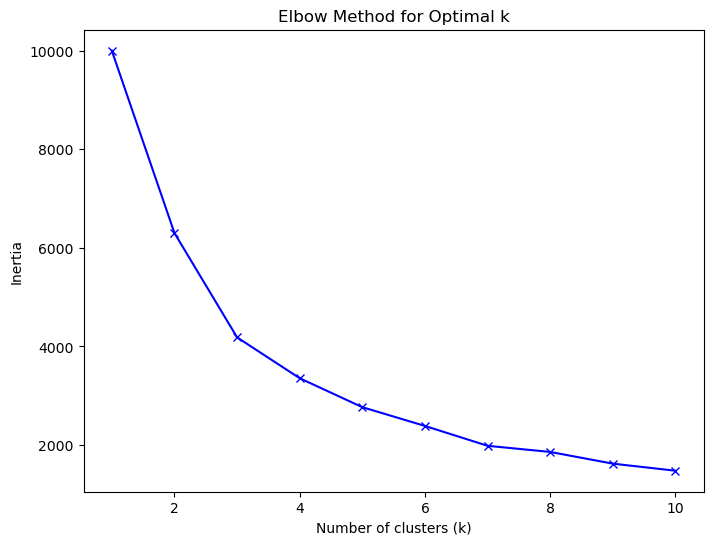

Davies Bouldin Index: 0.9167
Silhouette Coefficient: 0.3651
Optimal k: 3


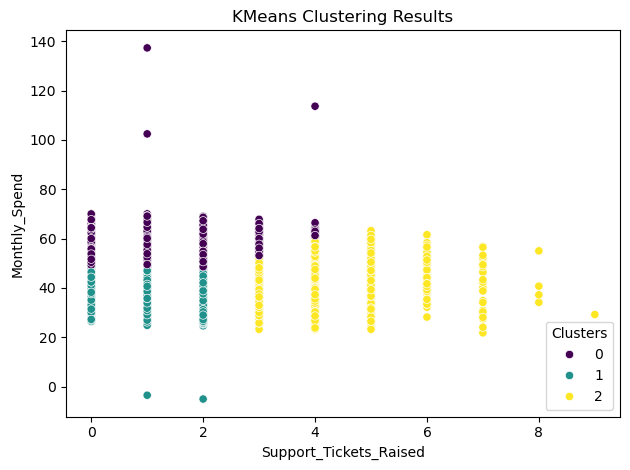

Evaluation Metrics for k:
 k  Silhouette Score   DBI
 1               NaN   NaN
 2             0.345 1.143
 3             0.365 0.917
 4             0.364 0.919
 5             0.348 0.925
 6             0.338 0.962
 7             0.365 0.851
 8             0.355 0.878
 9             0.373 0.854
10             0.375 0.864


In [109]:
results = run_kmeans_clustering(
    stream_df,
    feature_names=["Support_Tickets_Raised", "Monthly_Spend"],
    n_clusters=3,
    k_range=range(1, 11)
)


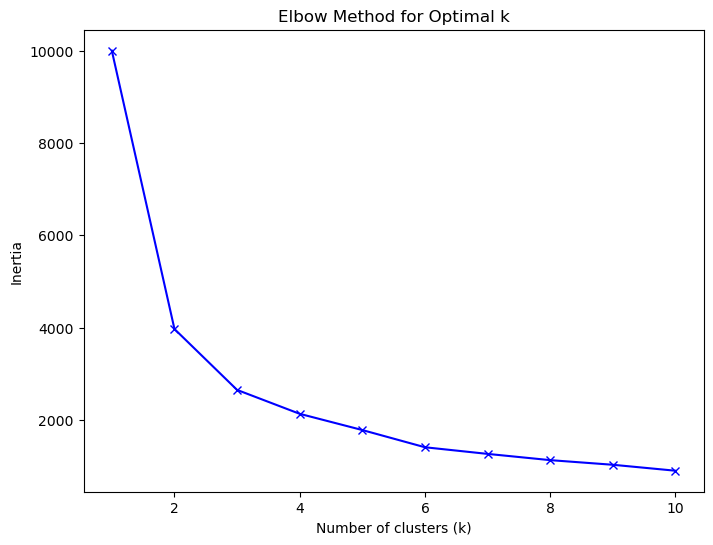

Davies Bouldin Index: 0.8376
Silhouette Coefficient: 0.4074
Optimal k: 3


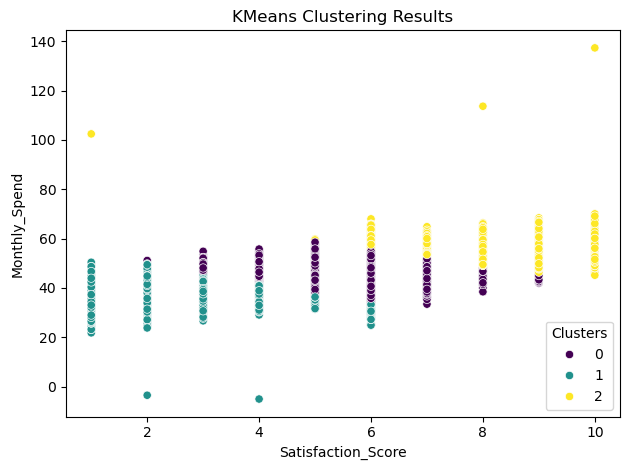

Evaluation Metrics for k:
 k  Silhouette Score   DBI
 1               NaN   NaN
 2             0.491 0.736
 3             0.407 0.838
 4             0.358 0.963
 5             0.375 0.863
 6             0.391 0.829
 7             0.371 0.871
 8             0.365 0.855
 9             0.355 0.890
10             0.357 0.885


In [110]:
results = run_kmeans_clustering(
    stream_df,
    feature_names=["Satisfaction_Score", "Monthly_Spend"],
    n_clusters=3,
    k_range=range(1, 11)
)

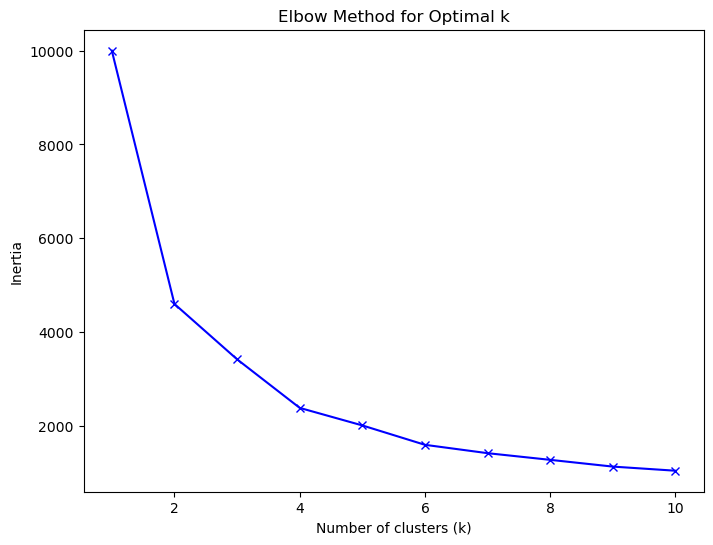

Davies Bouldin Index: 0.8352
Silhouette Coefficient: 0.3960
Optimal k: 4


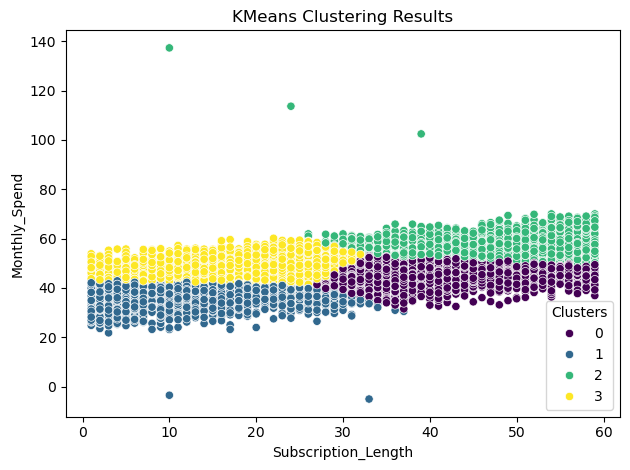

Evaluation Metrics for k:
 k  Silhouette Score   DBI
 1               NaN   NaN
 2             0.451 0.837
 3             0.356 1.007
 4             0.396 0.835
 5             0.367 0.870
 6             0.388 0.763
 7             0.368 0.819
 8             0.354 0.853
 9             0.358 0.810
10             0.343 0.842


In [111]:
results = run_kmeans_clustering(
    stream_df,
    feature_names=["Subscription_Length", "Monthly_Spend"],
    n_clusters=4,
    k_range=range(1, 11)
)

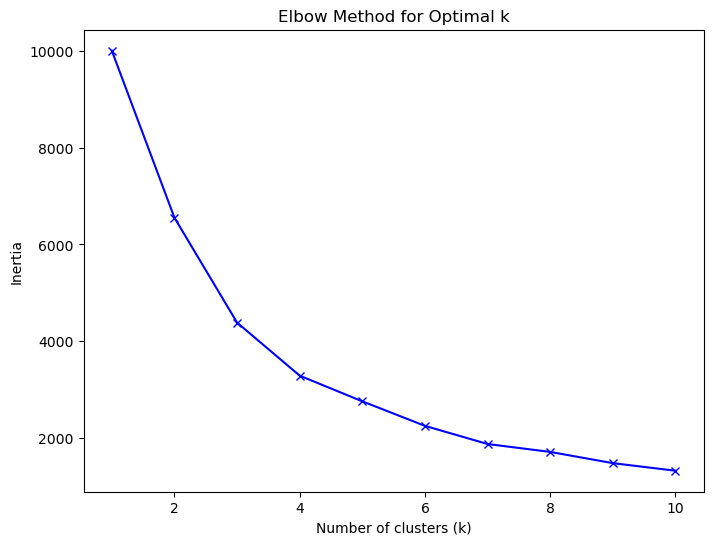

Davies Bouldin Index: 0.7949
Silhouette Coefficient: 0.3622
Optimal k: 7


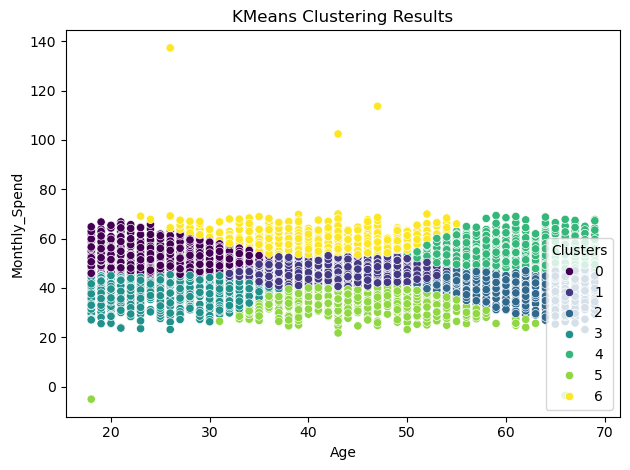

Evaluation Metrics for k:
 k  Silhouette Score   DBI
 1               NaN   NaN
 2             0.326 1.226
 3             0.346 0.941
 4             0.332 0.908
 5             0.338 0.890
 6             0.354 0.831
 7             0.362 0.795
 8             0.350 0.841
 9             0.355 0.810
10             0.351 0.818


In [112]:
results = run_kmeans_clustering(
    stream_df,
    feature_names=["Age", "Monthly_Spend"],
    n_clusters=7,
    k_range=range(1, 11)
)

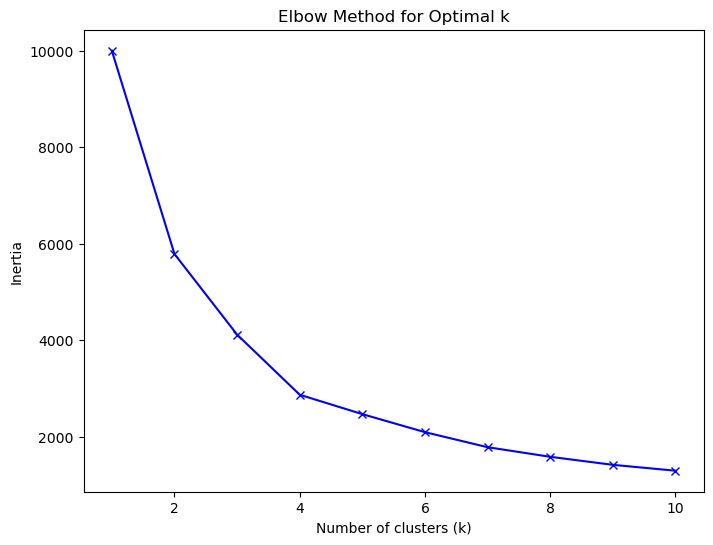

Davies Bouldin Index: 0.8603
Silhouette Coefficient: 0.3731
Optimal k: 4


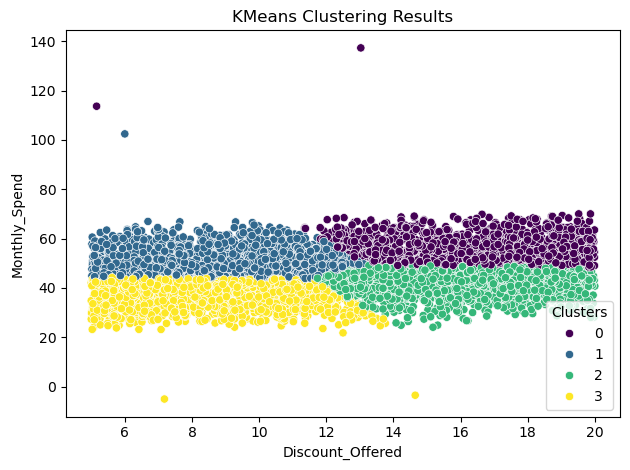

Evaluation Metrics for k:
 k  Silhouette Score   DBI
 1               NaN   NaN
 2             0.386 1.040
 3             0.364 0.915
 4             0.373 0.860
 5             0.340 0.928
 6             0.328 0.967
 7             0.343 0.843
 8             0.344 0.847
 9             0.340 0.836
10             0.341 0.830


In [113]:
results = run_kmeans_clustering(
    stream_df,
    feature_names=["Discount_Offered", "Monthly_Spend"],
    n_clusters=4,
    k_range=range(1, 11)
)

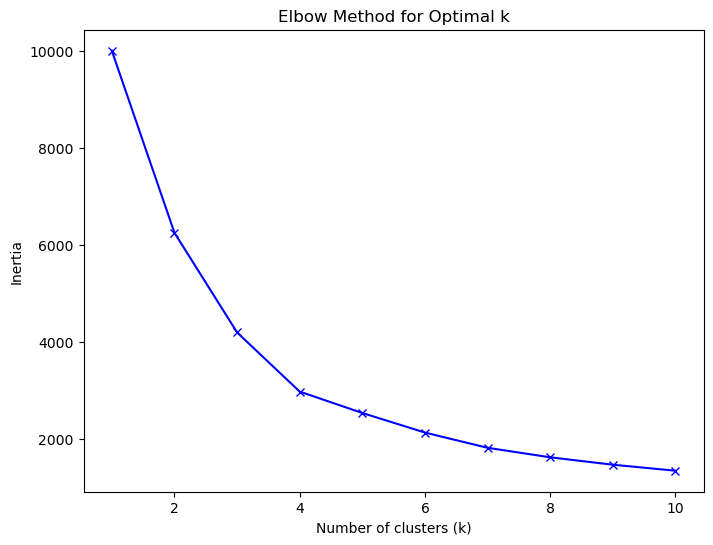

Davies Bouldin Index: 0.8579
Silhouette Coefficient: 0.3660
Optimal k: 4


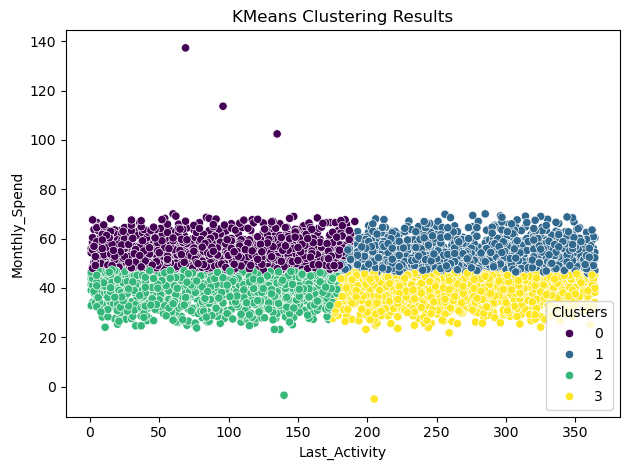

Evaluation Metrics for k:
 k  Silhouette Score   DBI
 1               NaN   NaN
 2             0.362 1.137
 3             0.365 0.883
 4             0.366 0.858
 5             0.354 0.871
 6             0.351 0.860
 7             0.346 0.821
 8             0.348 0.818
 9             0.342 0.818
10             0.337 0.840


In [114]:
results = run_kmeans_clustering(
    stream_df,
    feature_names=["Last_Activity", "Monthly_Spend"],
    n_clusters=4,
    k_range=range(1, 11)
)

# Hierarchical Clustering

In [116]:
feature_names = ["Support_Tickets_Raised", "Monthly_Spend"]

x = stream_df[feature_names]
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

from sklearn.cluster import AgglomerativeClustering
#Create an instance of the AgglomerativeClustering
# lass, with 3 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
#fit this model to our dataset. The following will
#both fit the model and output the predicted cluster labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [117]:
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
s_score = silhouette_score(x_scaled, agg_labels_pred)
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.9399
Silhouette Score: 0.3197


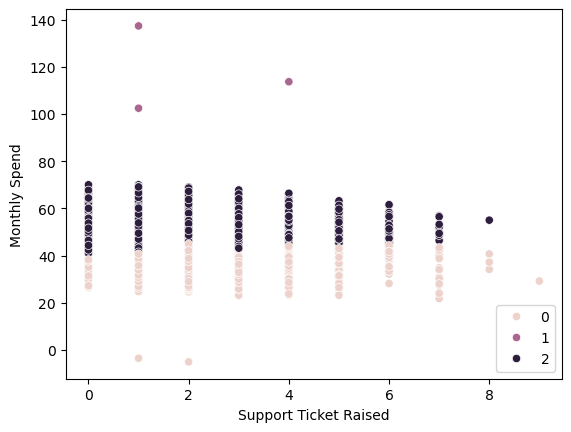

In [118]:
sns.scatterplot(data = stream_df, x = "Support_Tickets_Raised", y = "Monthly_Spend", hue =agg_labels_pred)
#Add a legend to show the cluster labels
plt.legend(loc = "lower right")
#Label both axes
plt.xlabel("Support Ticket Raised")
plt.ylabel("Monthly Spend")
#Show the figure
plt.show()

In [119]:
def run_agglomerative_clustering(stream_df, feature_names, n_clusters=3, linkage='complete'):
    
    x = stream_df[feature_names]                                #Extract the specified features for clustering
    scale = StandardScaler()                                    #Initialize a StandardScaler
    x_scaled = scale.fit_transform(x)                           #Scale the features to have mean=0 and std=1

    #Perform Agglomerative Clustering
    agg_model = AgglomerativeClustering(
        n_clusters=n_clusters,                                  #Set the number of clusters
        linkage=linkage                                         #Specify the linkage criterion
    )
    agg_labels_pred = agg_model.fit_predict(x_scaled)           #Fit and predict cluster labels

    db_score = davies_bouldin_score(x_scaled, agg_labels_pred)  #Calculate Davies-Bouldin score
    s_score = silhouette_score(x_scaled, agg_labels_pred)       #Calculate Silhouette score

    #Print evaluation metrics
    print("Davies Bouldin Score: %.4f" % db_score)              #Display Davies-Bouldin score
    print("Silhouette Score: %.4f" % s_score)                   #Display Silhouette score

    #Visualize clusters
    sns.scatterplot(data=stream_df, x=feature_names[0], y=feature_names[1], hue=agg_labels_pred, palette="viridis")
    plt.legend(title="Clusters", loc="lower right")             #Add legend to indicate cluster labels
    plt.xlabel(feature_names[0])                                #Label x-axis 
    plt.ylabel(feature_names[1])                                #Label y-axis 
    plt.title("Agglomerative Clustering Results")               #Add a title to the plot
    plt.tight_layout()                                          #Adjust layout to avoid overlap
    plt.show()                                                  #Show the plot

    # Return clustering metrics and labels
    return {
        "Davies Bouldin Score": db_score,
        "Silhouette Score": s_score,
        "Cluster Labels": agg_labels_pred
    }

Davies Bouldin Score: 0.9399
Silhouette Score: 0.3197


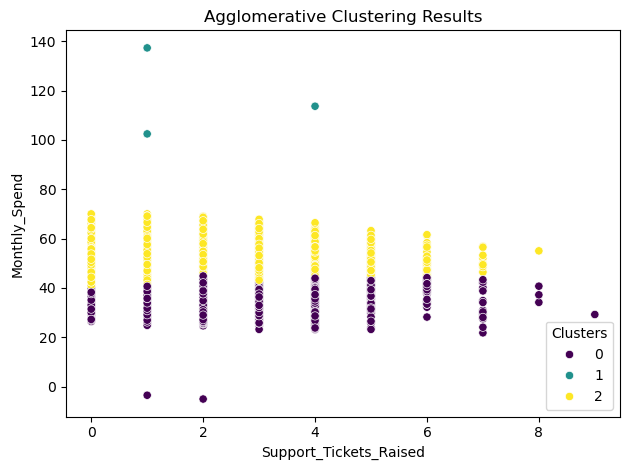

In [120]:
results = run_agglomerative_clustering(stream_df, feature_names=["Support_Tickets_Raised", "Monthly_Spend"], n_clusters=3, linkage='complete')

Davies Bouldin Score: 0.8585
Silhouette Score: 0.2415


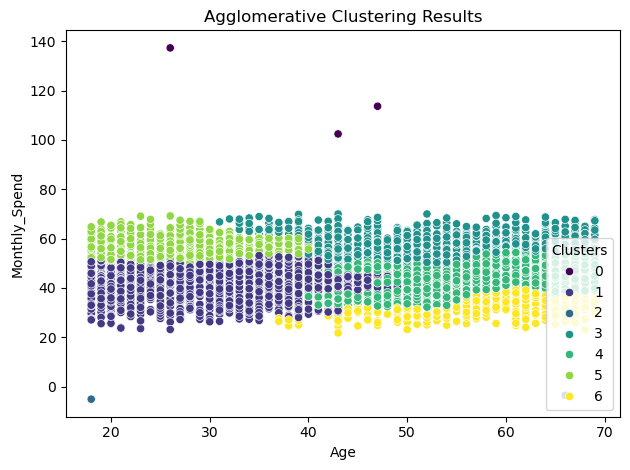

In [121]:
results = run_agglomerative_clustering(stream_df, feature_names=["Age", "Monthly_Spend"], n_clusters=7, linkage='complete')

Davies Bouldin Score: 0.5918
Silhouette Score: 0.3053


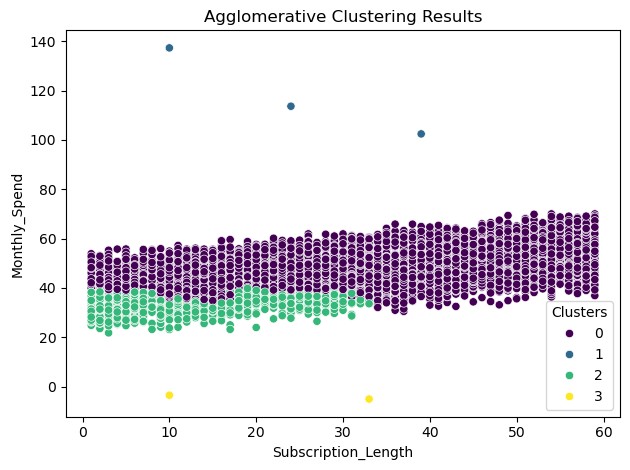

In [122]:
results = run_agglomerative_clustering(stream_df, feature_names=["Subscription_Length", "Monthly_Spend"], n_clusters=4, linkage='complete')

Davies Bouldin Score: 0.6340
Silhouette Score: 0.4795


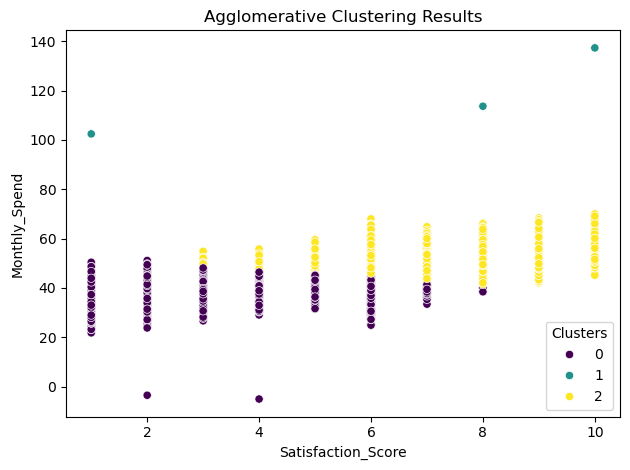

In [123]:
results = run_agglomerative_clustering(stream_df, feature_names=["Satisfaction_Score", "Monthly_Spend"], n_clusters=3, linkage='complete')

Davies Bouldin Score: 0.9004
Silhouette Score: 0.2726


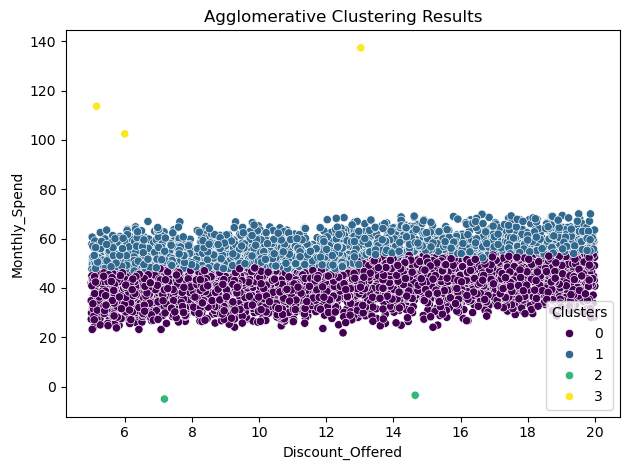

In [124]:
results = run_agglomerative_clustering(stream_df, feature_names=["Discount_Offered", "Monthly_Spend"], n_clusters=4, linkage='complete')

Davies Bouldin Score: 0.8259
Silhouette Score: 0.2958


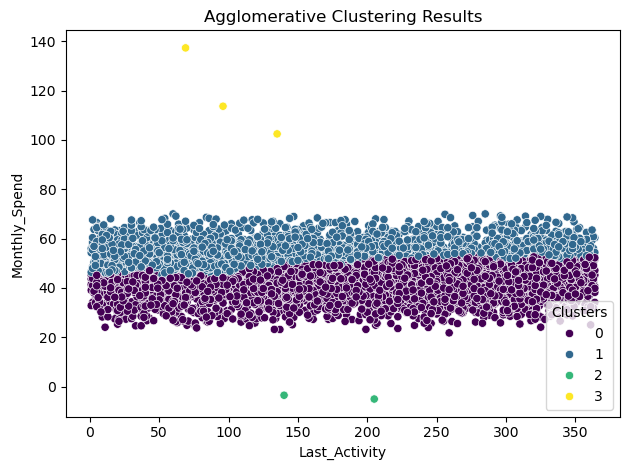

In [125]:
results = run_agglomerative_clustering(stream_df, feature_names=["Last_Activity", "Monthly_Spend"], n_clusters=4, linkage='complete')